<center> <h1> Tópicos de Ciência de Dados <h1> 
<h2> Trabalho Laboratorial <h2> 
<h4> Tiago Conceição &  Davi Nascimento<h4> <center>

In [1]:
!pip install ReliefF

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
import warnings
from scipy import stats
from scipy import stats, signal
from scipy.signal import periodogram, welch
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from ReliefF import ReliefF
from sklearn.feature_selection import chi2
warnings.filterwarnings('ignore')

In [2]:
dir = "/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD"

col_labels = ["Id",
            "ACC_X",
            "ACC_Y",
            "ACC_Z",
            "GYRO_X",
            "GYRO_Y",
            "GYRO_Z",
            "MAG_X",
            "MAG_Y",
            "MAG_Z",
            "TimeStamp",
            "Label"
]

activity_labels = np.array([
    'Stand',
    'Sit',
    'Sit and Talk',
    'Walk',
    'Walk and Talk',
    'Climb Stairs (CS)',
    'CS and Talk',
    'Stand to Sit',
    'Sit to Stand',
    'Stand to Sit and Talk',
    'Sit to Stand and Talk',
    'Stand to Walk',
    'Walk to Stand',
    'Stand to CS/CS and Talk',
    'CS to Walk',
    'CS and Talk to Walk and Talk'
])

sensors = [
    'ACC',
    'GYR',
    'MAG'
]

T = 2
f = 51.2

<h2> Exercício 2 </h2>

In [3]:
def read_file(n_ids=1, dev=2):
    dfs = []

    for id in range(n_ids):
        #for dev_total in range(1,6):
        file_path = dir + "/part"+ str(id) + "/part" + str(id) + "dev" + str(dev) + ".csv"
        csv_file = open(file_path)
        display(csv_file)
        csv_reader = csv.reader(csv_file, delimiter=',')
        data_np = np.array(list(csv_reader)).astype(float)

        data = pd.DataFrame(data_np)
        data.columns = col_labels
        
        dfs.append(data)
        
    data = pd.concat(dfs,axis=0)
    data['Label'] = data['Label'].astype(int)
    return data

In [4]:
data = read_file()
display(data)

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part0/part0dev2.csv' mode='r' encoding='UTF-8'>

Id   ACC_X   ACC_Y   ACC_Z    GYRO_X   GYRO_Y    GYRO_Z    MAG_X  \
0      2.0  3.0317  9.0450  3.1739  0.762470  3.70710 -0.313840  0.57764   
1      2.0  2.9591  9.0436  3.1400  0.405880  4.66820 -0.101480  0.58385   
2      2.0  2.9465  9.0545  3.0799  0.242300  5.52250  0.348570  0.56522   
3      2.0  2.7898  9.0528  3.0726  0.498580  6.34630  0.611270  0.56108   
4      2.0  2.6924  9.0377  2.9794  0.631970  6.69720  1.005600  0.57764   
...    ...     ...     ...     ...       ...      ...       ...      ...   
52859  2.0  2.3837  9.0681  3.4339 -0.429610 -1.75440 -0.300480  0.35197   
52860  2.0  2.4075  8.9945  3.3985 -0.279800 -1.72390  0.129850  0.35197   
52861  2.0  2.3837  9.0316  3.4346 -0.043147 -0.77803  0.195980  0.32919   
52862  2.0  2.3236  9.0922  3.4472 -0.125830 -0.56445 -0.016121  0.33747   
52863  2.0  2.2991  9.1032  3.3996 -0.532890 -1.52560  0.026206  0.33333   

         MAG_Y    MAG_Z    TimeStamp  Label  
0      0.68849  1.26540       63.629      1  
1      0.68849  1.27410       83.160      1  
2      0.67857  1.26750      102.690      1  
3      0.65476  1.26100      122.220      1  
4      0.69246  1.26750      141.750      1  
...        ...      ...          ...    ...  
52859  0.88294  0.69737  1039200.000      1  
52860  0.86706  0.69079  1039200.000      1  
52861  0.84722  0.69956  1039300.000      1  
52862  0.88889  0.70614  1039300.000      1  
52863  0.82937  0.69737  1039300.000      1  

[52864 rows x 12 columns]

<h2> Exercicio 3.1 </h2>

In [5]:
def module(data):
    sensors_by_activity = {}
    for act in range(1,17):
        modulo = return_activity(data, act)
        ACC_MOD,GYRO_MOD,MAG_MOD = calc_module(modulo)
        sensors_by_activity_temp = {'Label': activity_labels[act-1],
                                    'ACC': ACC_MOD,
                                    'GYR': GYRO_MOD,  
                                    'MAG': MAG_MOD
                                    }
        join_series = pd.DataFrame(sensors_by_activity_temp)
        sensors_by_activity[activity_labels[act-1]] = join_series
    return sensors_by_activity, ACC_MOD, GYRO_MOD,MAG_MOD

def return_activity(data, act):
    data_fim = data.loc[data["Id"] == 2]
    return data_fim[data_fim["Label"] == act]

def calc_module(act_data):
    ACC_MOD = np.sqrt((act_data["ACC_X"]**2) + (act_data["ACC_Y"]**2) + (act_data["ACC_Z"]**2))
    GYRO_MOD = np.sqrt((act_data["GYRO_X"]**2) + (act_data["GYRO_Y"]**2) + (act_data["GYRO_Z"]**2))
    MAG_MOD = np.sqrt((act_data["MAG_X"]**2) + (act_data["MAG_Y"]**2) + (act_data["MAG_Z"]**2))

    return ACC_MOD,GYRO_MOD,MAG_MOD

In [6]:
tudo = pd.DataFrame(columns=["Activity", "Module_ACC", "Module_GYRO", "Module_MAG"])
for act in range(1,17):
    transformed_data, ACC_BOX_PLOT, GYRO_BOX_PLOT, MAG_BOX_PLOT = module(data)
    for index, row in transformed_data[activity_labels[act-1]].iterrows():
            tudo = tudo.append({"Activity Labels": activity_labels[act-1], "ACC Values": row["ACC"], "GYRO Values": row["GYR"], "MAG Values": row["MAG"]}, ignore_index=True)    

[Text(0, 0, 'Stand'),
 Text(1, 0, 'Sit'),
 Text(2, 0, 'Sit and Talk'),
 Text(3, 0, 'Walk'),
 Text(4, 0, 'Walk and Talk'),
 Text(5, 0, 'Climb Stairs (CS)'),
 Text(6, 0, 'CS and Talk'),
 Text(7, 0, 'Stand to Sit'),
 Text(8, 0, 'Sit to Stand'),
 Text(9, 0, 'Stand to Sit and Talk'),
 Text(10, 0, 'Sit to Stand and Talk'),
 Text(11, 0, 'Stand to Walk'),
 Text(12, 0, 'Walk to Stand'),
 Text(13, 0, 'Stand to CS/CS and Talk'),
 Text(14, 0, 'CS to Walk'),
 Text(15, 0, 'CS and Talk to Walk and Talk')]

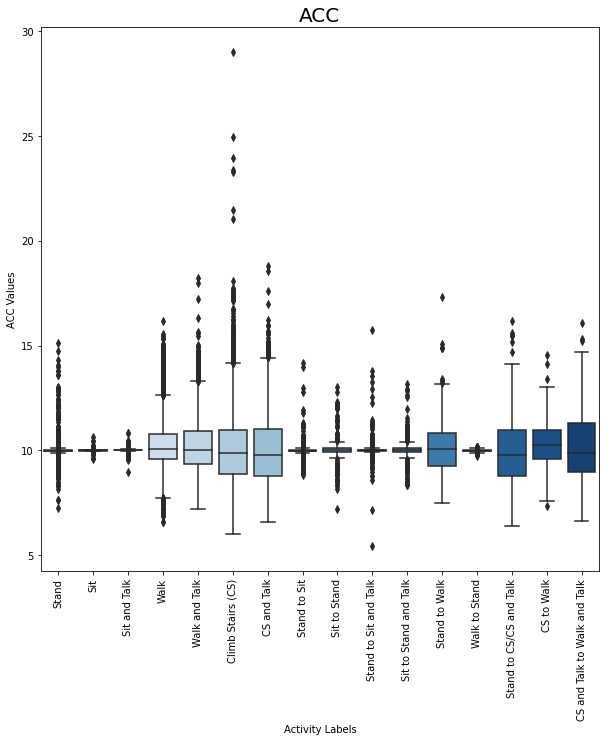

In [7]:
plt.figure(figsize=(10, 10))
plt.title("ACC", fontsize=20)
ax = sns.boxplot(x="Activity Labels", y="ACC Values",palette="Blues", data=tudo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Stand'),
 Text(1, 0, 'Sit'),
 Text(2, 0, 'Sit and Talk'),
 Text(3, 0, 'Walk'),
 Text(4, 0, 'Walk and Talk'),
 Text(5, 0, 'Climb Stairs (CS)'),
 Text(6, 0, 'CS and Talk'),
 Text(7, 0, 'Stand to Sit'),
 Text(8, 0, 'Sit to Stand'),
 Text(9, 0, 'Stand to Sit and Talk'),
 Text(10, 0, 'Sit to Stand and Talk'),
 Text(11, 0, 'Stand to Walk'),
 Text(12, 0, 'Walk to Stand'),
 Text(13, 0, 'Stand to CS/CS and Talk'),
 Text(14, 0, 'CS to Walk'),
 Text(15, 0, 'CS and Talk to Walk and Talk')]

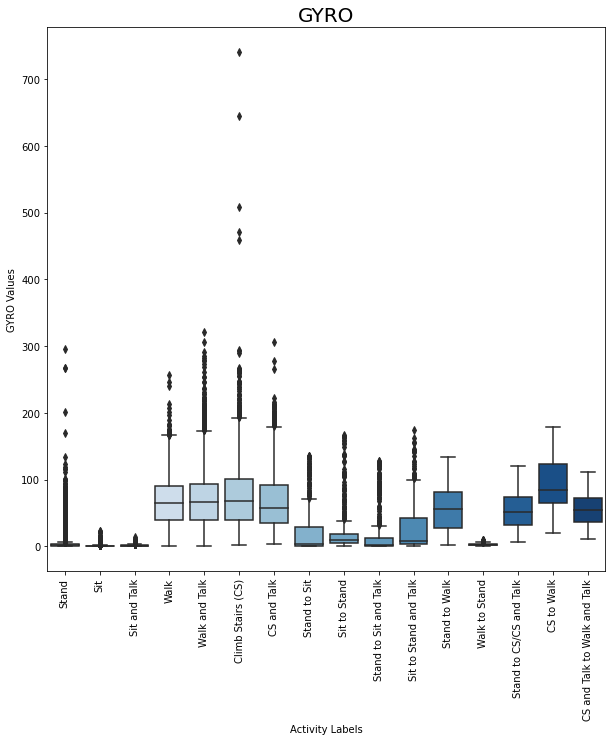

In [8]:
plt.figure(figsize=(10, 10))
plt.title("GYRO", fontsize=20)
ax = sns.boxplot(x="Activity Labels", y="GYRO Values",palette="Blues", data=tudo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Stand'),
 Text(1, 0, 'Sit'),
 Text(2, 0, 'Sit and Talk'),
 Text(3, 0, 'Walk'),
 Text(4, 0, 'Walk and Talk'),
 Text(5, 0, 'Climb Stairs (CS)'),
 Text(6, 0, 'CS and Talk'),
 Text(7, 0, 'Stand to Sit'),
 Text(8, 0, 'Sit to Stand'),
 Text(9, 0, 'Stand to Sit and Talk'),
 Text(10, 0, 'Sit to Stand and Talk'),
 Text(11, 0, 'Stand to Walk'),
 Text(12, 0, 'Walk to Stand'),
 Text(13, 0, 'Stand to CS/CS and Talk'),
 Text(14, 0, 'CS to Walk'),
 Text(15, 0, 'CS and Talk to Walk and Talk')]

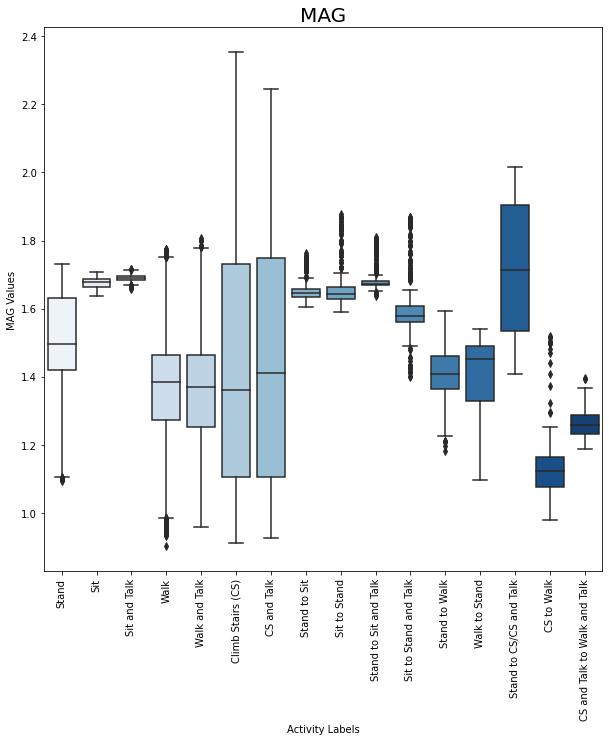

In [9]:
plt.figure(figsize=(10, 10))
plt.title("MAG", fontsize=20)
ax = sns.boxplot(x="Activity Labels", y="MAG Values", palette="Blues",data=tudo)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<h2> Exercicio 3.2 </h2>

In [11]:
sensors_test = ["ACC","GYR","MAG"]
def density(t):
    q1 = np.quantile(t,0.25)
    q3 = np.quantile(t,0.75)
    ipr = q3-q1
    print(ipr)

    upper_limit = q3+(1.5*ipr)
    lower_limit = q1-(1.5*ipr)
    
    n_outlier = len(t[(t > upper_limit) | (t < lower_limit)])
    nr = len(t)
    
    teste = (n_outlier/nr) * 100
    print(n_outlier)
    return (n_outlier/nr) * 100

density_dataFrame = pd.DataFrame(columns=["Activity", "Sensor", "Density"])
for act in activity_labels[0:]:
    for sen in sensors_test:
        density_dataFrame = density_dataFrame.append({'Activity':act, 'Sensor': sen, 'Density': density(transformed_data[act][sen])}, ignore_index=True)

0.06349768762554575
762
2.063127340859401
902
0.21044217995691183
12
0.018252580648553618
201
0.409904398458366
368
0.025076796215552033
0
0.029869164485150534
357
1.130898442174113
324
0.011050072391824761
45
1.2249962157238343
363
50.87879589941875
26
0.1912670773093761
106
1.589272484517526
192
53.199432304996535
117
0.21072899065041018
12
2.116911768017152
209
61.278446252873316
76
0.6258299910511995
0
2.2465226876932007
50
57.59198505963698
45
0.6441074660867232
0
0.061134690182983675
116
28.718240164469034
51
0.02236411981412023
55
0.19400869779204832
63
14.447561654474777
63
0.0356768722995755
43
0.05137811179096019
99
12.02009783017275
70
0.012878130116130038
69
0.20849051188661782
88
39.17222936667899
23
0.047108368141732804
96
1.572298956193098
8
54.11283232014213
0
0.09694154277063216
6
0.06582019664240057
21
1.9474826172948494
13
0.16033831906695872
0
2.202029572310277
6
41.63963140779712
0
0.3707305646672614
0
1.4089626003650704
4
58.142311053696034
0
0.08585606516989608
1

In [12]:
stand = density_dataFrame.iloc[0:3]
sit = density_dataFrame.iloc[3:6]
sittalk = density_dataFrame.iloc[6:9]
walk = density_dataFrame.iloc[9:12]
walktalk = density_dataFrame.iloc[12:15]
CS = density_dataFrame.iloc[15:18]
CStalk =density_dataFrame.iloc[18:21]
standsit = density_dataFrame.iloc[21:24]
sitstand = density_dataFrame.iloc[24:27]
standsittalk = density_dataFrame.iloc[27:30]
sitstandtalk = density_dataFrame.iloc[30:33]
standwalk = density_dataFrame.iloc[33:36]
walkstand = density_dataFrame.iloc[36:39]
standcstalk = density_dataFrame.iloc[39:42]
cswalk = density_dataFrame.iloc[42:45]
cstalkwalktalk = density_dataFrame.iloc[45:48]

In [13]:
stand

Activity Sensor   Density
0    Stand    ACC  6.919724
1    Stand    GYR  8.191064
2    Stand    MAG  0.108972

In [14]:
sit

Activity Sensor   Density
3      Sit    ACC  3.489583
4      Sit    GYR  6.388889
5      Sit    MAG       0.0

In [15]:
sittalk

Activity Sensor   Density
6  Sit and Talk    ACC  6.197917
7  Sit and Talk    GYR     5.625
8  Sit and Talk    MAG   0.78125

In [16]:
walk

Activity Sensor   Density
9      Walk    ACC  4.169538
10     Walk    GYR  0.298645
11     Walk    MAG  1.217551

In [17]:
walktalk

Activity Sensor   Density
12  Walk and Talk    ACC  2.026599
13  Walk and Talk    GYR  1.234959
14  Walk and Talk    MAG  0.126662

In [18]:
CS

Activity Sensor   Density
15  Climb Stairs (CS)    ACC  3.201103
16  Climb Stairs (CS)    GYR  1.164037
17  Climb Stairs (CS)    MAG       0.0

In [19]:
CStalk

Activity Sensor   Density
18  CS and Talk    ACC  1.774938
19  CS and Talk    GYR  1.597444
20  CS and Talk    MAG       0.0

In [20]:
standsit

Activity Sensor    Density
21  Stand to Sit    ACC  30.208333
22  Stand to Sit    GYR   13.28125
23  Stand to Sit    MAG  14.322917

In [21]:
sitstand

Activity Sensor    Density
24  Sit to Stand    ACC   16.40625
25  Sit to Stand    GYR   16.40625
26  Sit to Stand    MAG  11.197917

In [22]:
standsittalk

Activity Sensor    Density
27  Stand to Sit and Talk    ACC   25.78125
28  Stand to Sit and Talk    GYR  18.229167
29  Stand to Sit and Talk    MAG   17.96875

In [23]:
sitstandtalk

Activity Sensor    Density
30  Sit to Stand and Talk    ACC  22.916667
31  Sit to Stand and Talk    GYR   5.989583
32  Sit to Stand and Talk    MAG       25.0

In [24]:
standwalk

Activity Sensor   Density
33  Stand to Walk    ACC  3.149606
34  Stand to Walk    GYR       0.0
35  Stand to Walk    MAG  2.362205

In [25]:
walkstand

Activity Sensor   Density
36  Walk to Stand    ACC  4.133858
37  Walk to Stand    GYR  2.559055
38  Walk to Stand    MAG       0.0

In [26]:
standcstalk

Activity Sensor   Density
39  Stand to CS/CS and Talk    ACC  2.362205
40  Stand to CS/CS and Talk    GYR       0.0
41  Stand to CS/CS and Talk    MAG       0.0

In [27]:
cswalk

Activity Sensor    Density
42  CS to Walk    ACC   3.149606
43  CS to Walk    GYR        0.0
44  CS to Walk    MAG  11.811024

In [28]:
cstalkwalktalk

Activity Sensor   Density
45  CS and Talk to Walk and Talk    ACC  2.362205
46  CS and Talk to Walk and Talk    GYR       0.0
47  CS and Talk to Walk and Talk    MAG  2.362205

<h2> Exercicio 3.3 </h2>

In [10]:
def zScore(data, k):
    mean = data.mean()
    std = data.std()

    Z = (data - mean) / std # Fórmula para obter o z-score

    outliers = data.loc[Z.loc[(Z < -k) | (Z > k)].index] # Valores considerados outliers 
    not_outliers = data.loc[Z.loc[(Z >= -k) & (Z <= k)].index] # Valores não outliers
    
    #print(len(data),'= ',len(not_outliers),' - ',len(outliers))
    
    return [outliers, not_outliers] # retornamos os arrays

<h2> Exercicio 3.4 </h2>

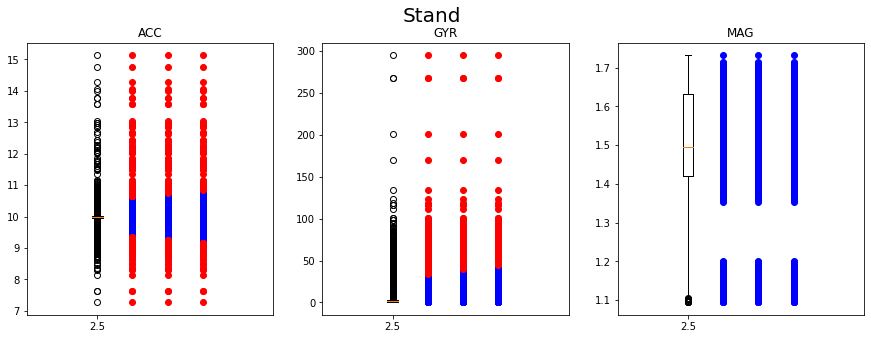

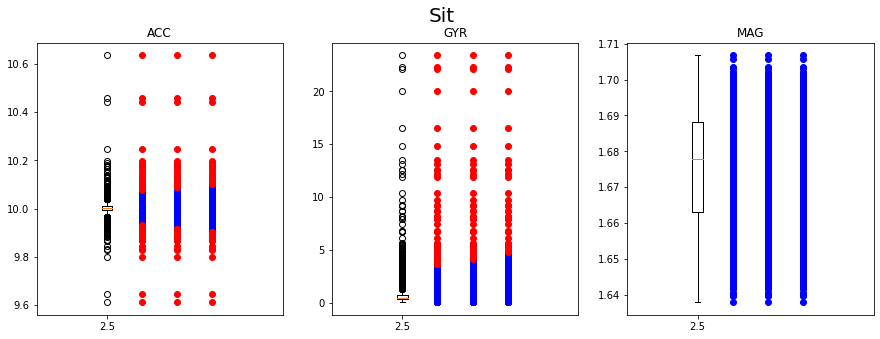

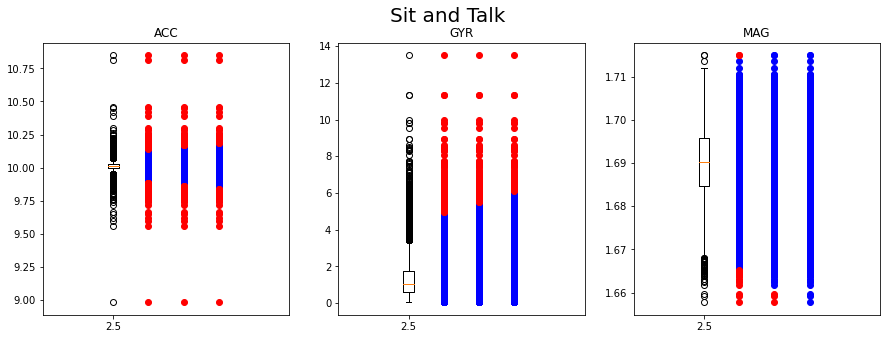

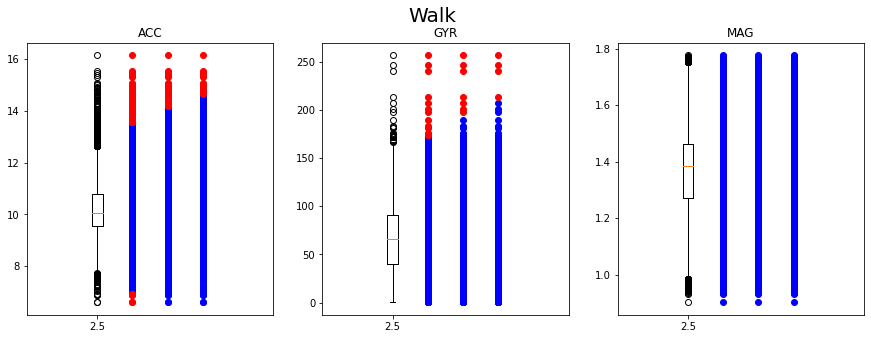

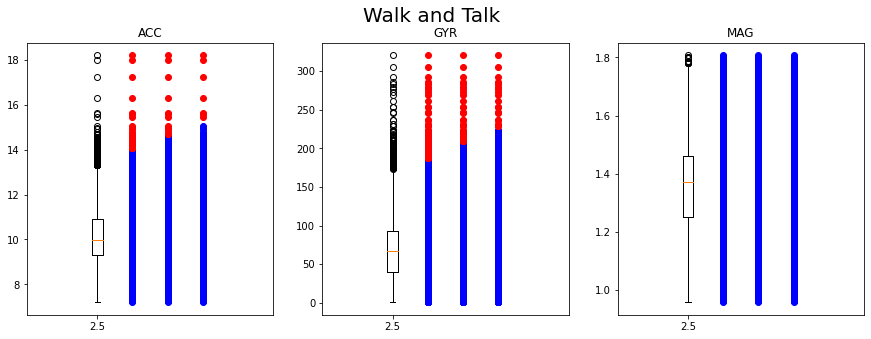

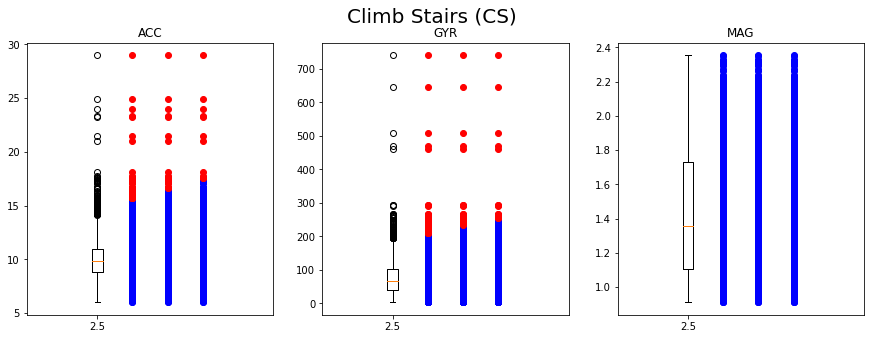

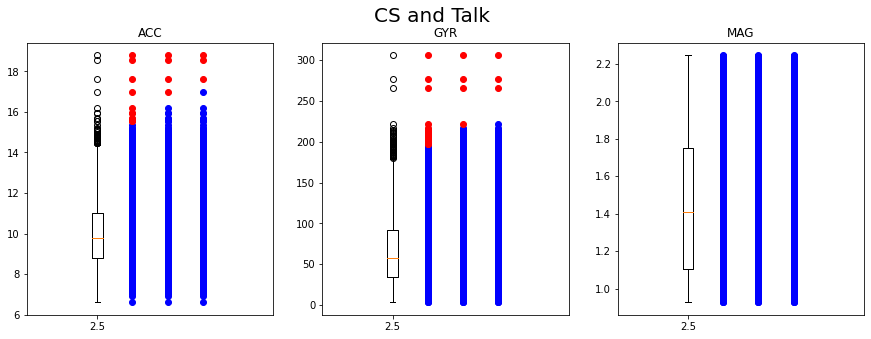

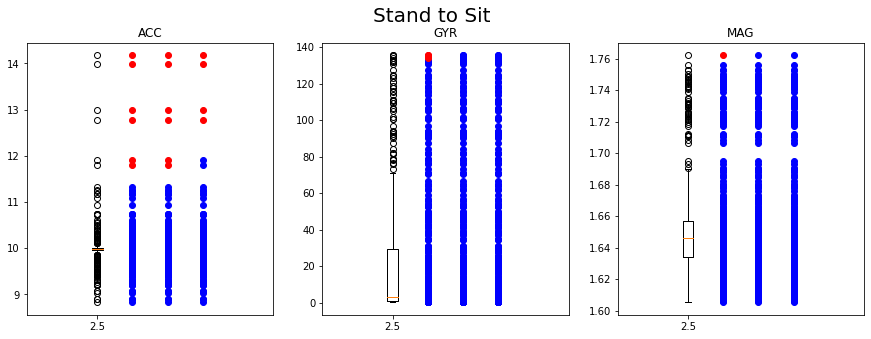

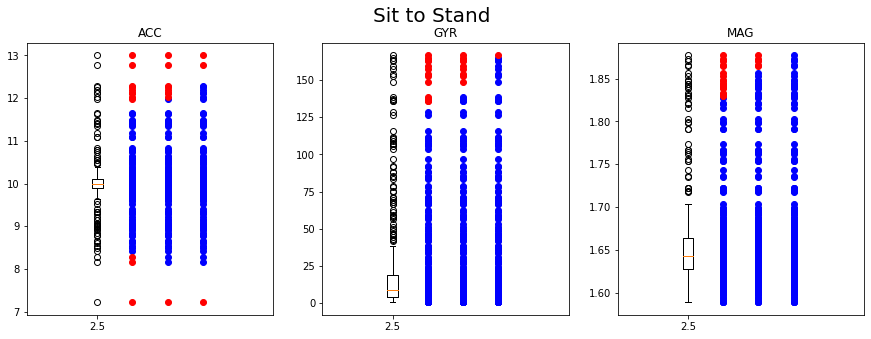

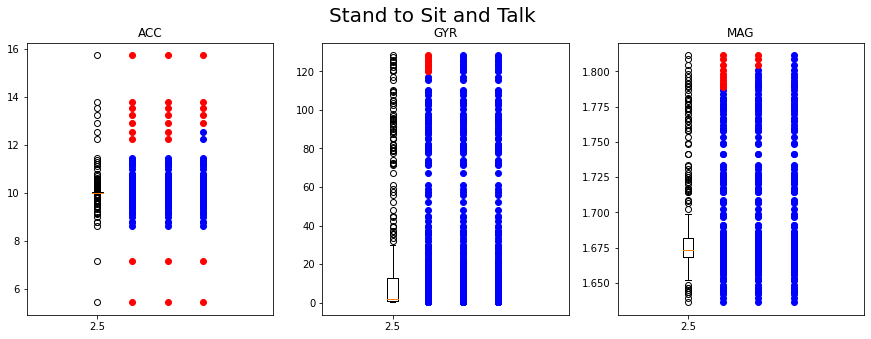

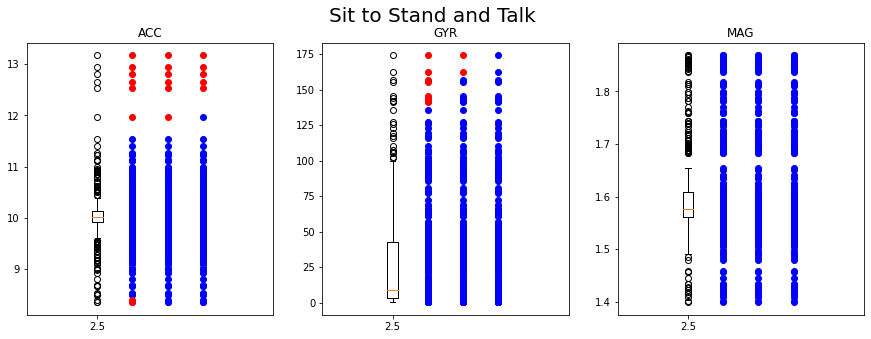

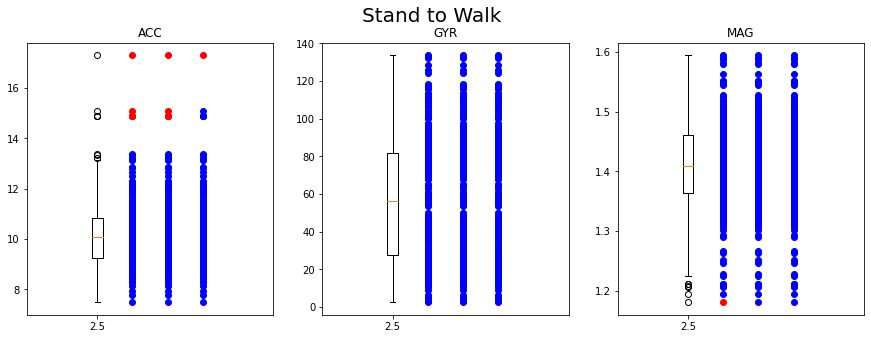

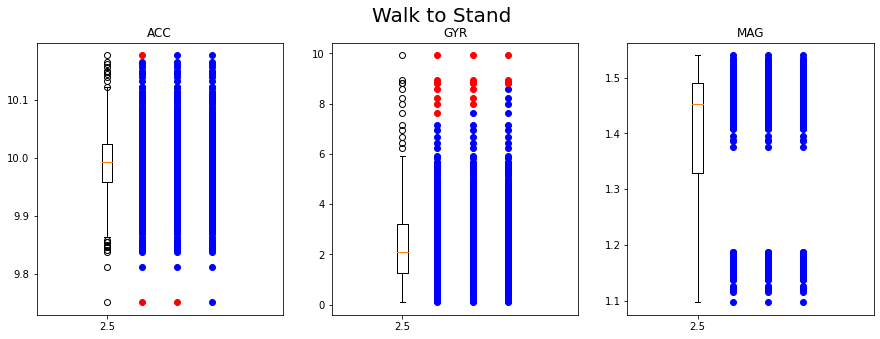

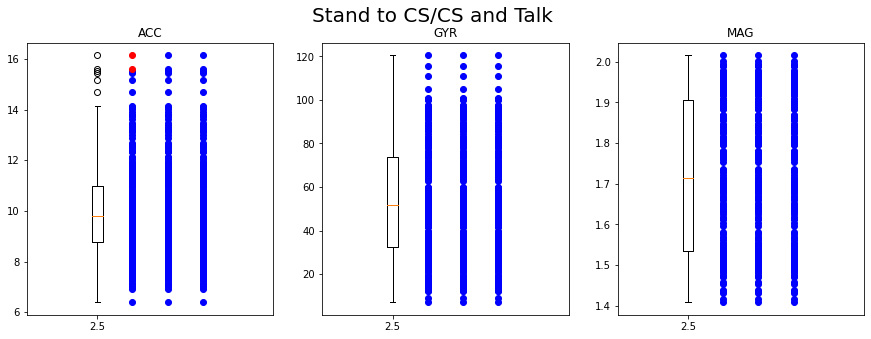

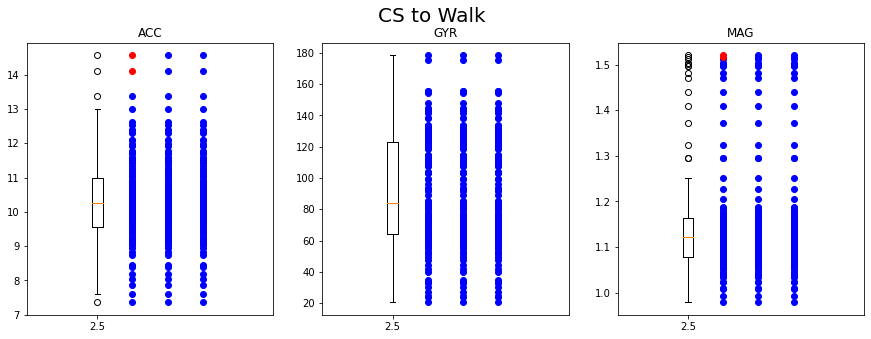

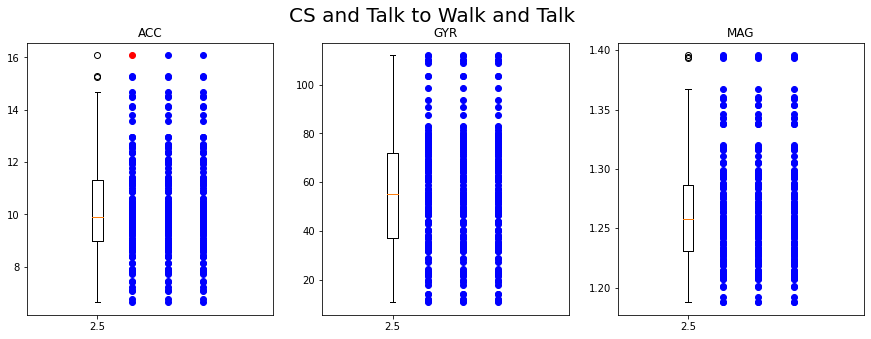

In [11]:
def zScorePlot(data):
   k_values = [3, 3.5, 4] # valores de k para analisar e comparar
   
   for act in activity_labels[0:]: # para cada atividade
      # figura para atividade
      fig, axs = plt.subplots(1,3,figsize =(15, 5))
      fig.suptitle(act, fontsize=20)
      
      i=0
      for vector in sensors: # para cada vector
         data_act = data.get(act)[vector]

         axs[i].set_title(vector)
         axs[i].boxplot(data_act, positions=[2.5])
         axs[i].set_xlim(1.5,5)

         for k in k_values: # para cada valor k 
            [outliers, not_outliers] = zScore(data_act, k) # obtemos o zScore
            axs[i].scatter(x=np.full(not_outliers.shape[0],k), y=not_outliers, color = 'blue', label='Not Outliers k=' + str(k))
            axs[i].scatter(x=np.full(outliers.shape[0],k), y=outliers, color='red', label='Outliers k=' + str(k))
         i+=1
      plt.show()
      plt.close()
         
zScorePlot(transformed_data)

<h2> Exercicio 3.6 </h2>

In [12]:
# k-means
def assign_points(data, centroids):
     data = data.copy()
      # Percorremos cada ponto para atribuir o centroid mais perto 
     for index, row in data.iterrows():
           # Percorremos cada Centroid
          for i in range(len(centroids)): 
                # Calcula a distância do ponto atual ao centroid atual
               dst = np.sqrt((row['x'] - centroids[i][0])**2 + (row['y'] - centroids[i][1])**2 + (row['z'] - centroids[i][2])**2)
               
                # Verifica se o campo distancia está definido e se estiver, verifica se a nova distância calculada é menor do que a distância atual
               if(data.loc[index,'Distance'] == -1 or data.loc[index,'Distance'] > dst):
                    data.loc[index,'Distance'] = dst # Atualiza a Distância
                    data.loc[index,'Clusters'] = i # Atualiza o Cluster
                    
     return data 

def update_centroids(data, centroids):
      # Percorremos cada Centroid para computar o novo centroid (mean) para cada
     for i in range(len(centroids)):
          # Computamos a média do x , y e z de cada centroid
          centroids[i][0] = data['x'].loc[data['Clusters'] == i].mean() # x
          centroids[i][1] = data['y'].loc[data['Clusters'] == i].mean() # y
          centroids[i][2] = data['z'].loc[data['Clusters'] == i].mean() # z
  
      # Retornamos o array de centroids atualizado
     return centroids

def k_means(data, n):
     data = data.copy()
     # Randomly initialize n centroids
     centroids = [[] for _ in range(n)]

     for i in range(n): # Initialize with some values from the input data
          centroids[i] = data.sample().to_numpy()[0]
     
          # Inicializamos as variáveis
     data['Distance'] = -1 # Distância do próximo cluster
     data['Clusters'] = -1 # Cluster pertencente
     
     cluster_ant = 0

          # Does until the Centroid positions do not change
     while(not data['Clusters'].equals(cluster_ant)):
          # Assign each point to its closest centroid
          data = assign_points(data, centroids)

          # Compute the new Centroid of each cluster
          centroids = update_centroids(data, centroids)

          # Stores the previous cluster
          cluster_ant = data['Clusters'].copy()
     
     return [data, centroids]

<h2> Exercicio 3.7 </h2>

Stand


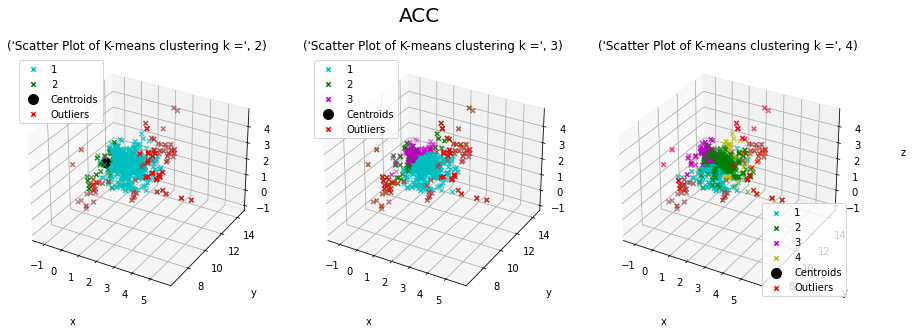

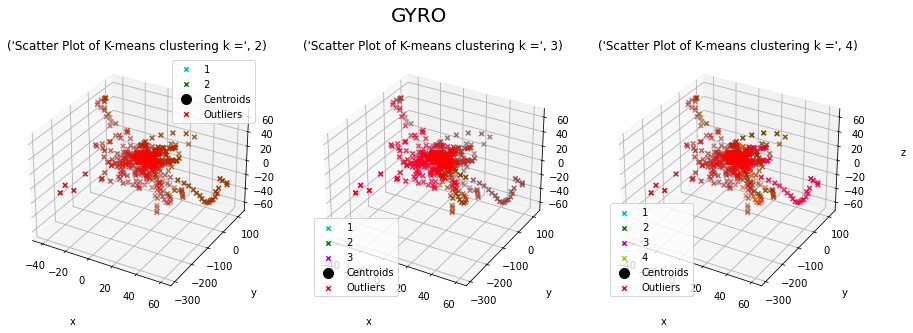

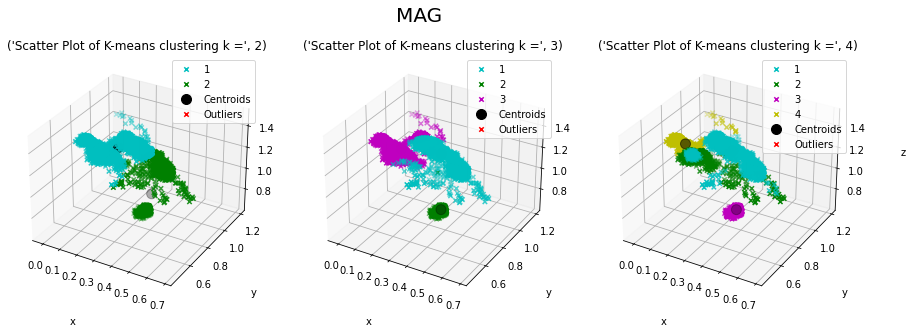

Sit


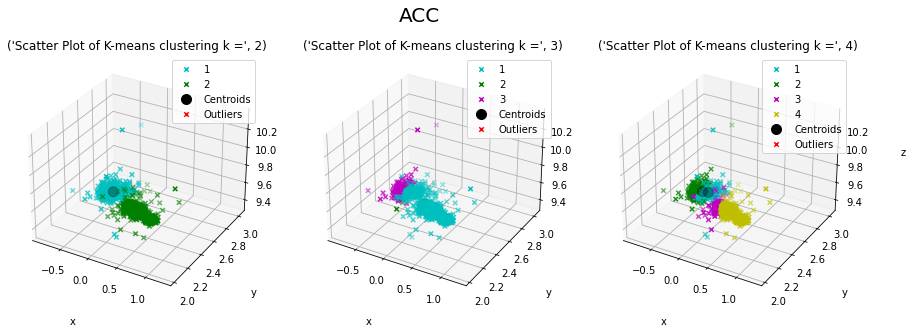

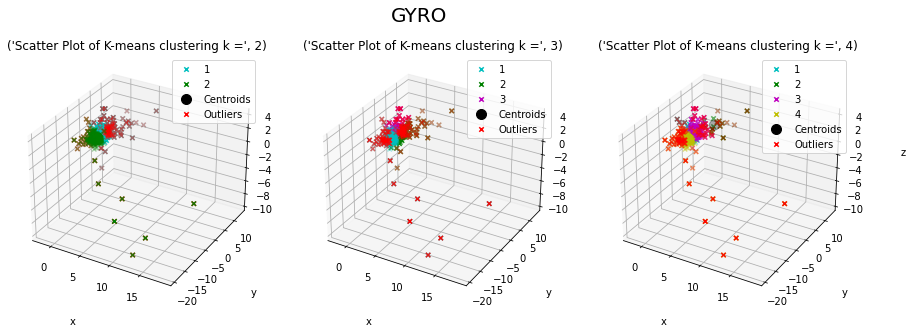

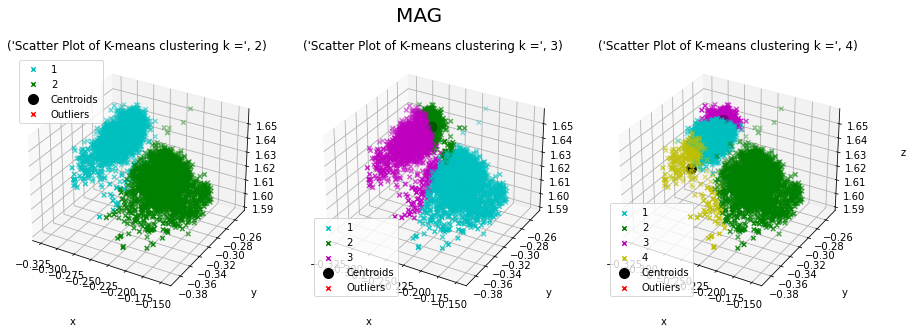

Sit and Talk


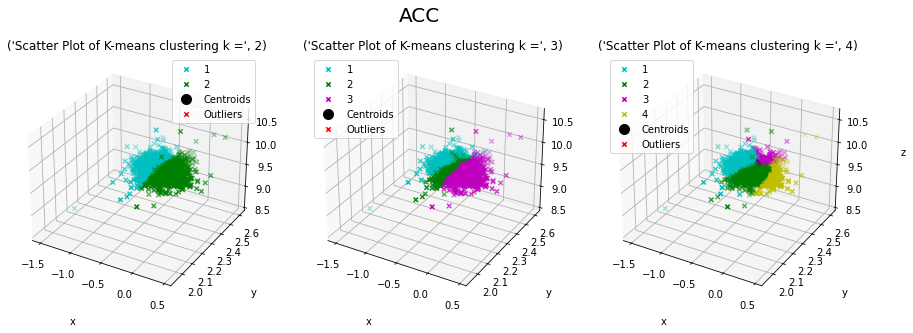

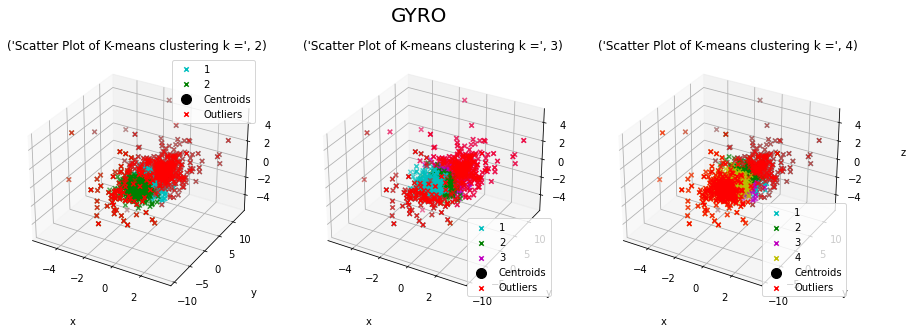

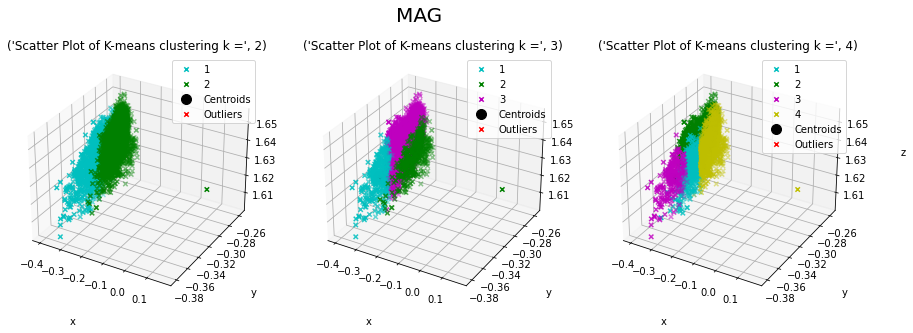

Walk


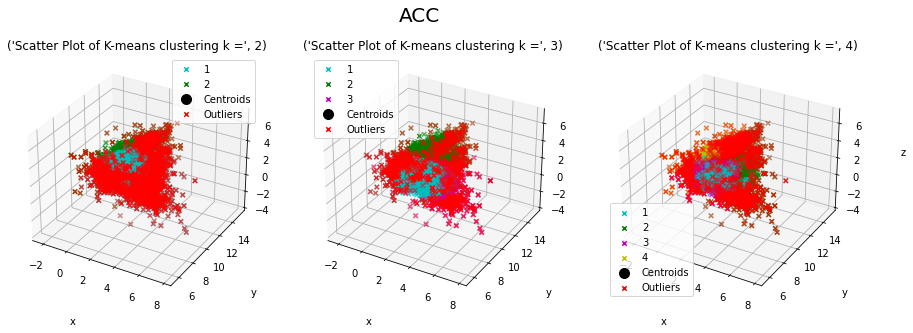

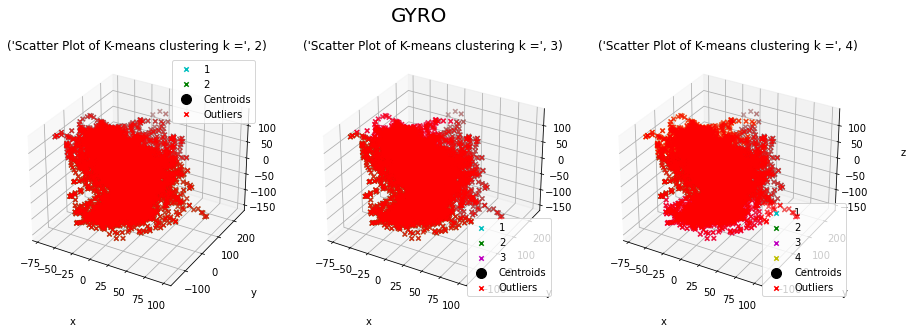

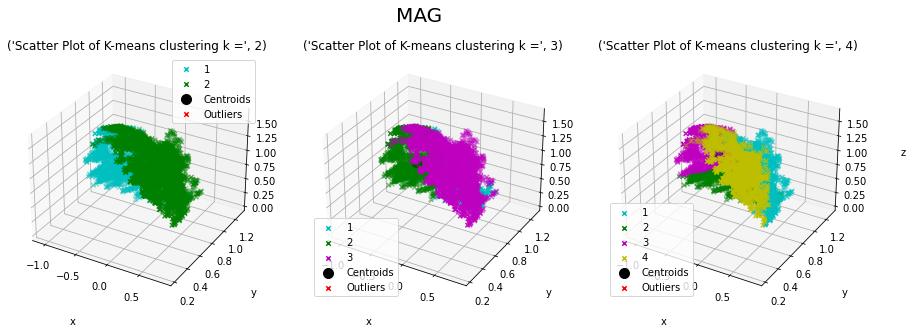

Walk and Talk


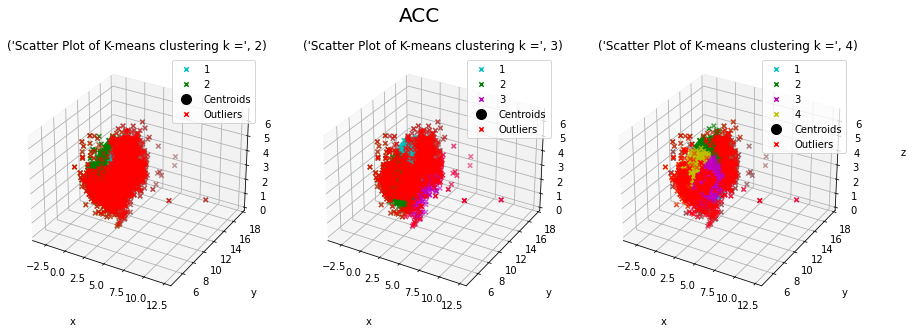

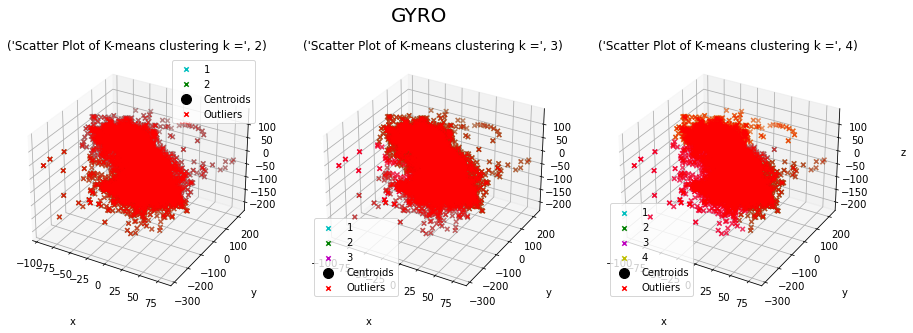

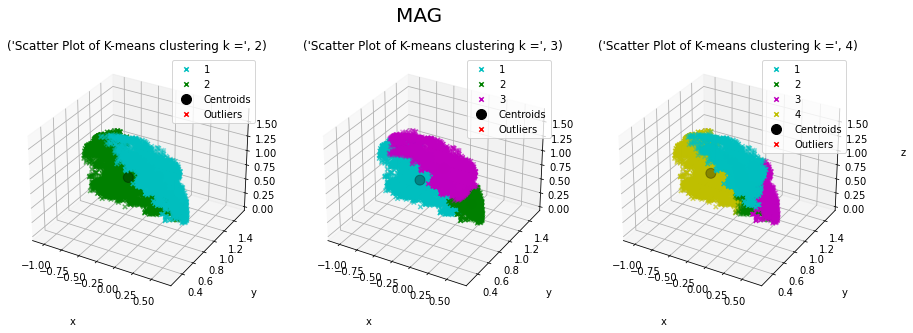

Climb Stairs (CS)


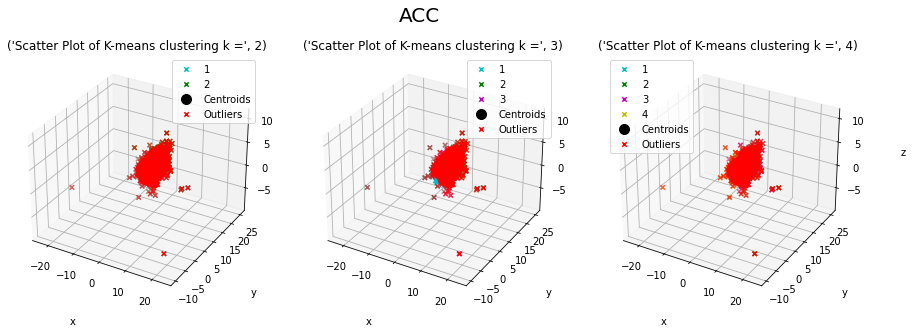

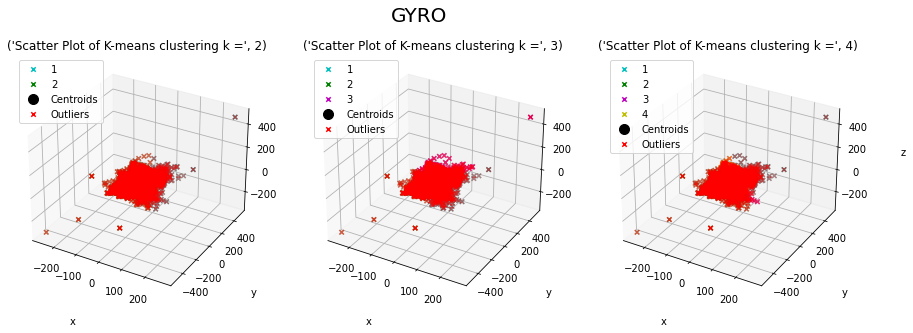

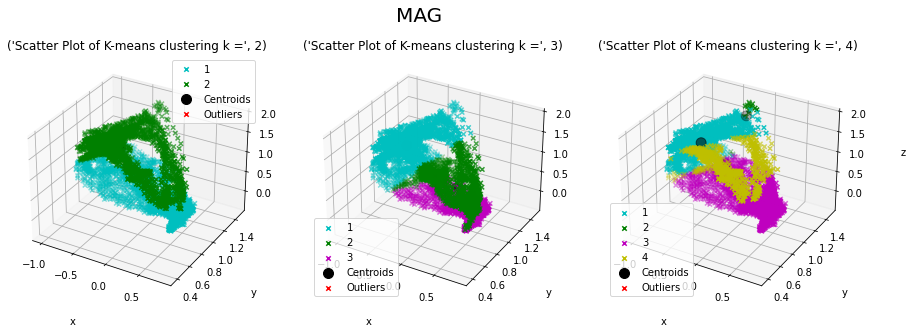

CS and Talk


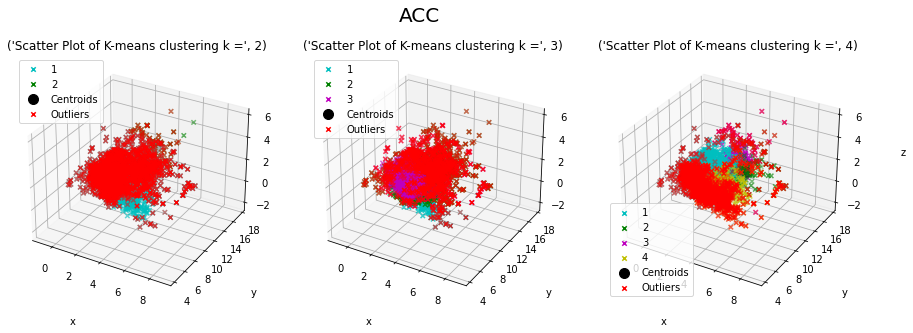

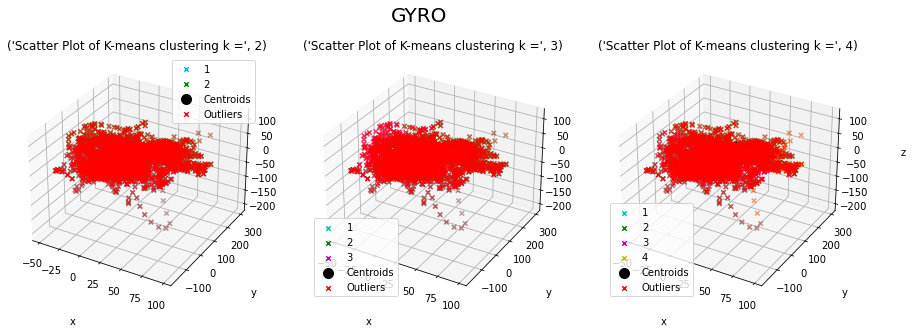

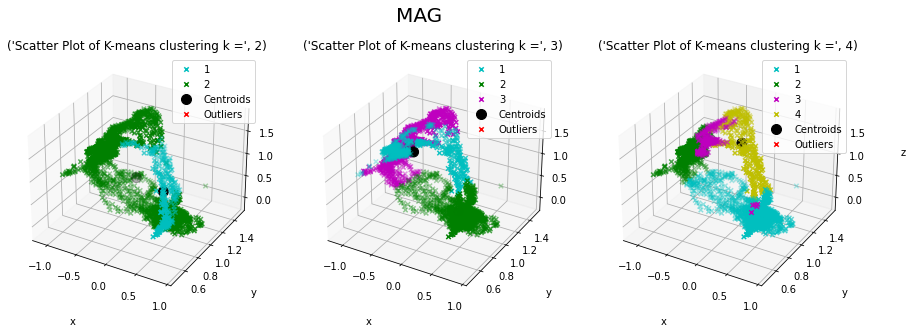

Stand to Sit


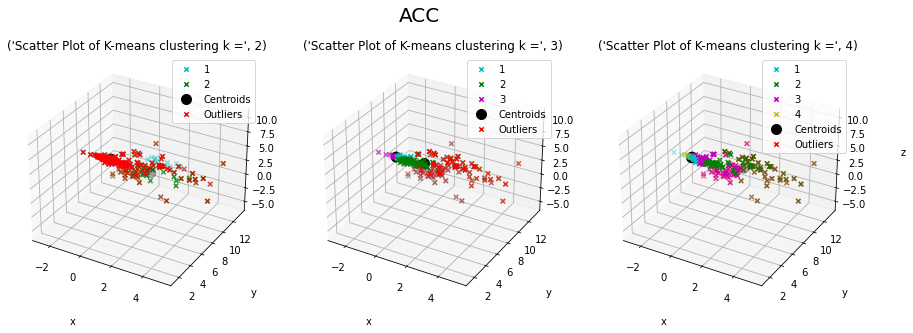

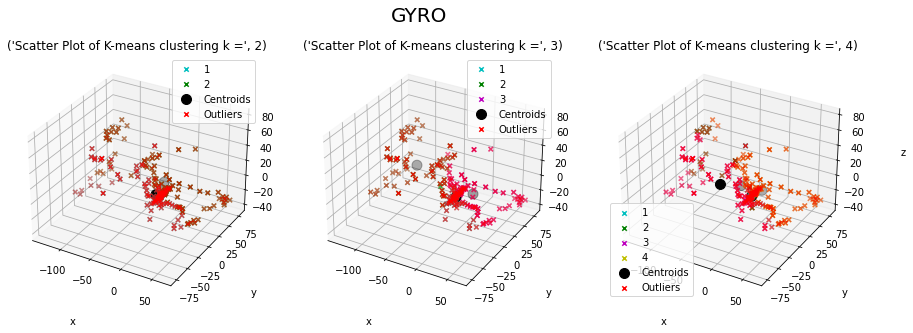

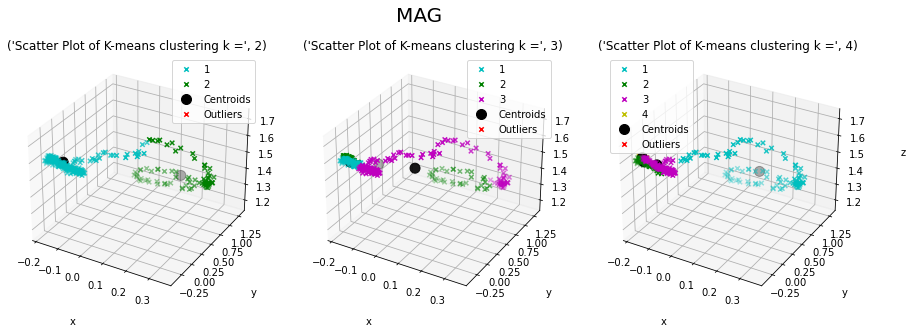

Sit to Stand


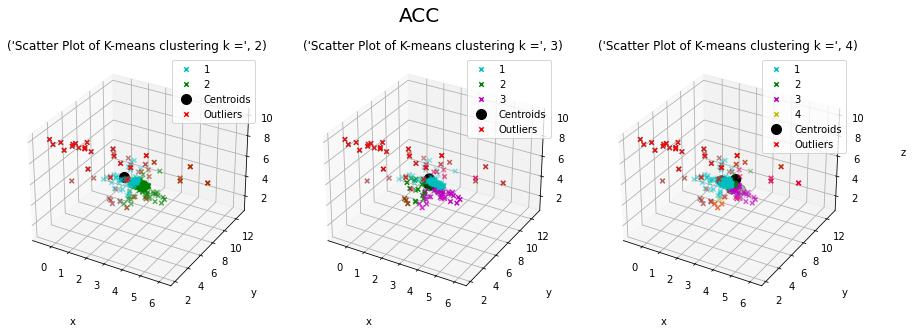

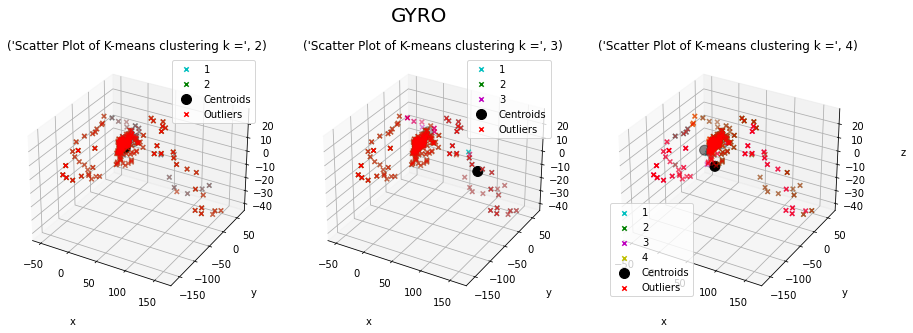

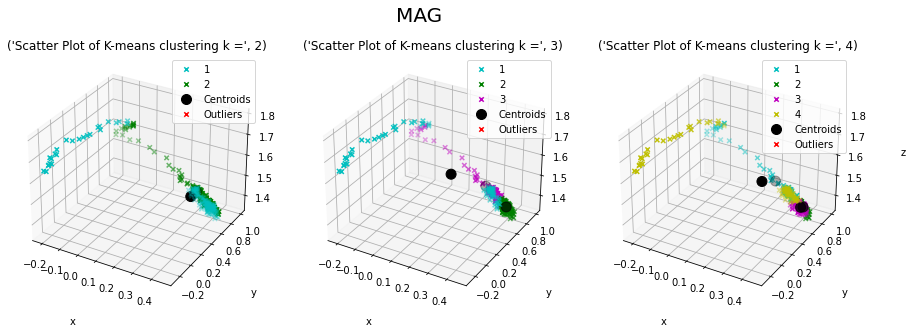

Stand to Sit and Talk


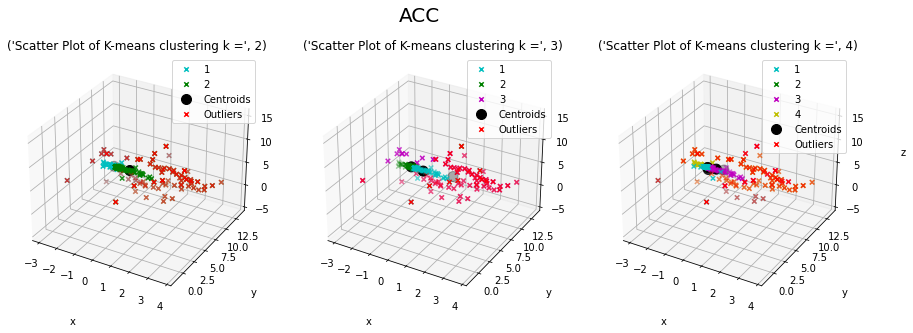

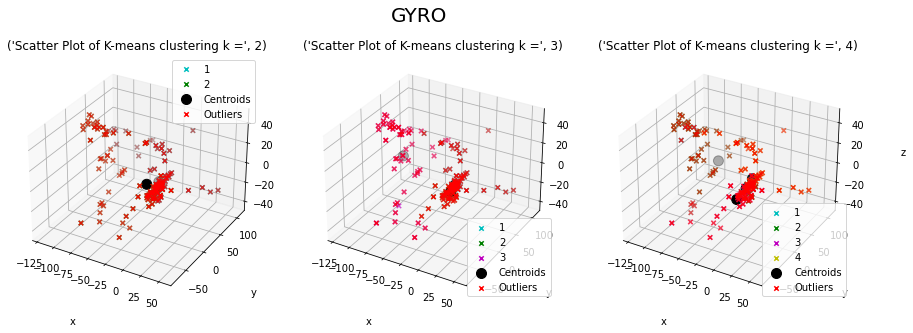

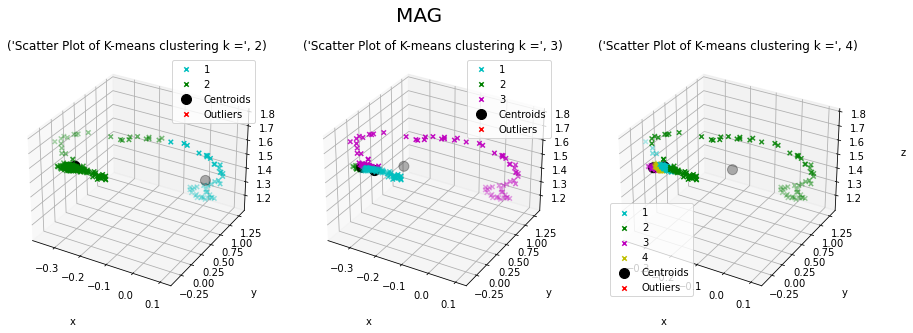

Sit to Stand and Talk


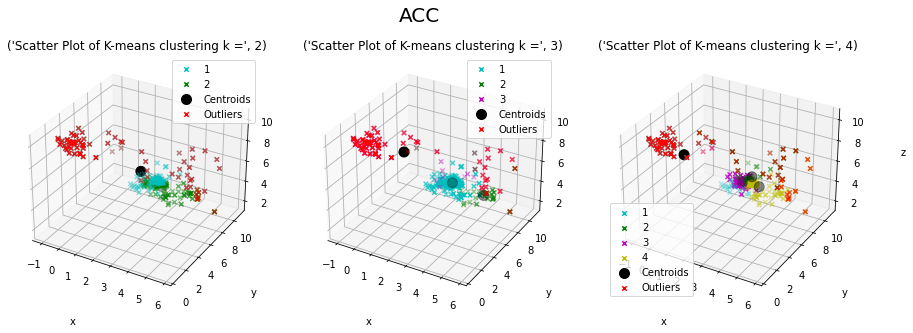

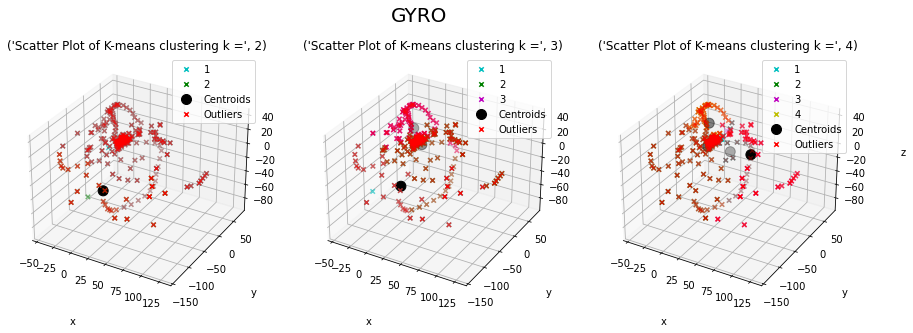

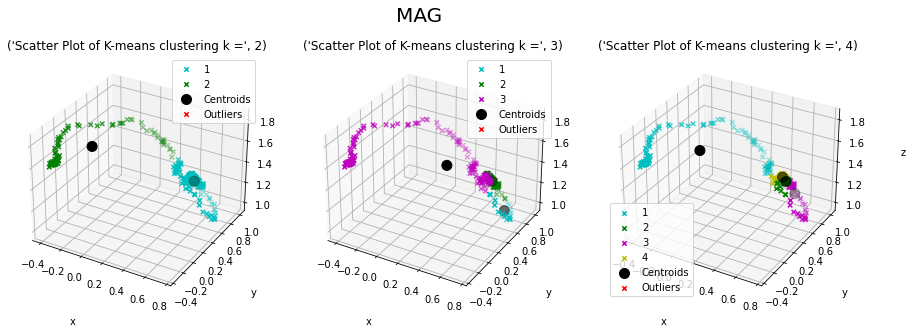

Stand to Walk


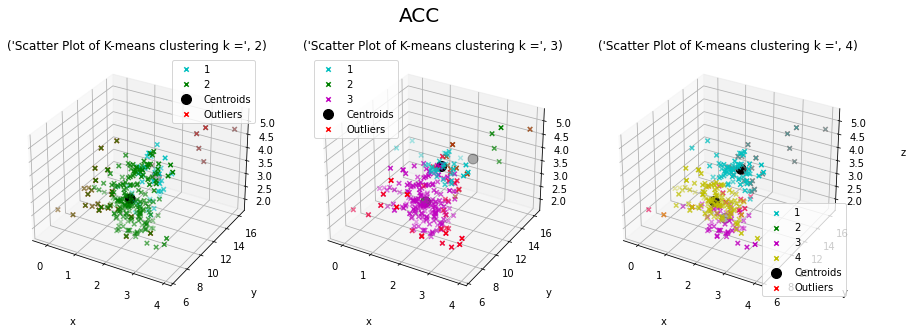

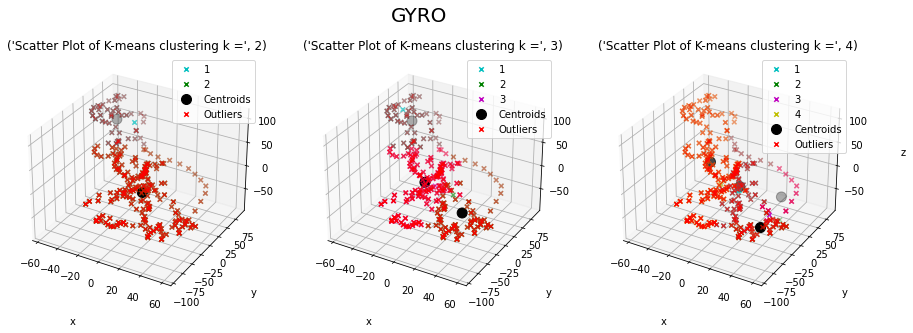

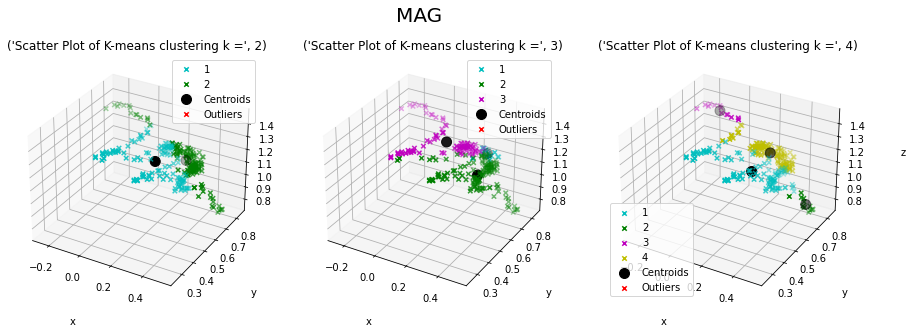

Walk to Stand


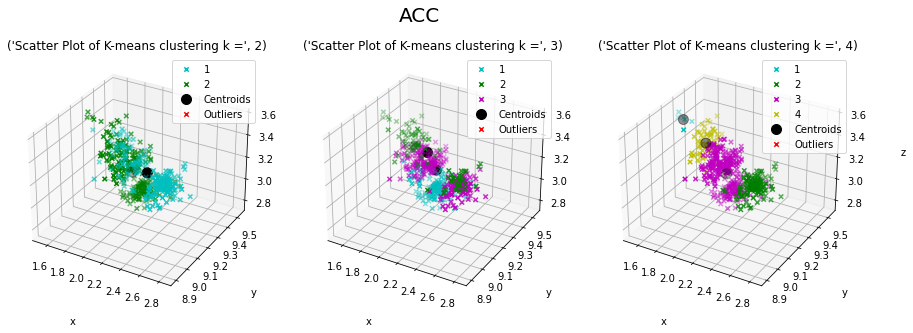

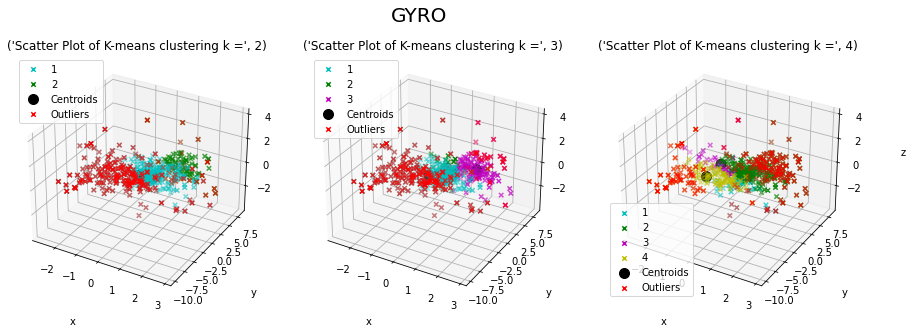

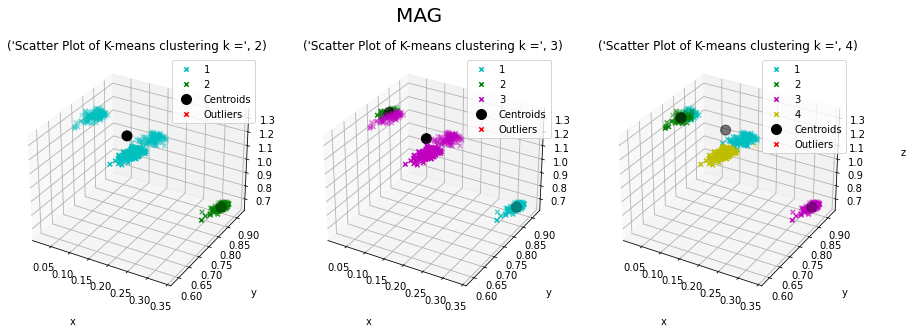

Stand to CS/CS and Talk


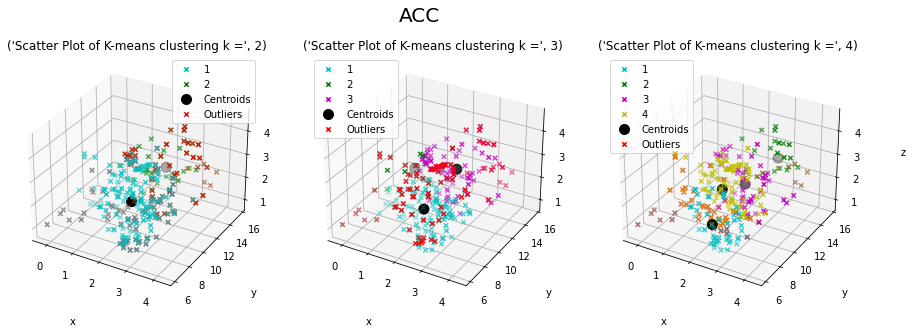

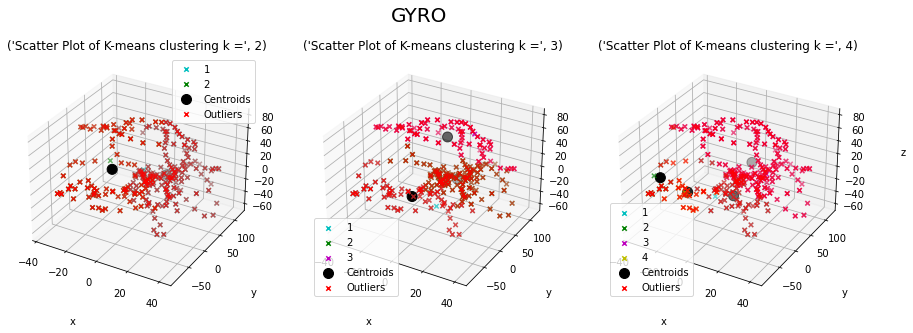

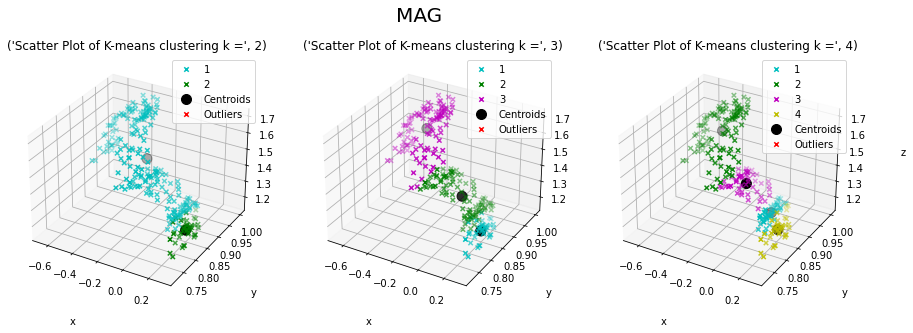

CS to Walk


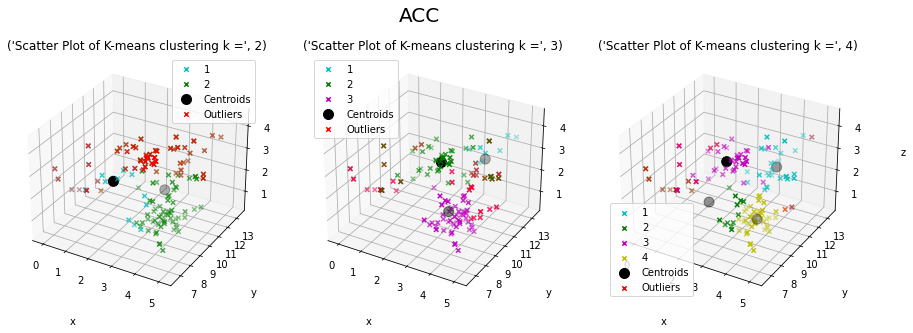

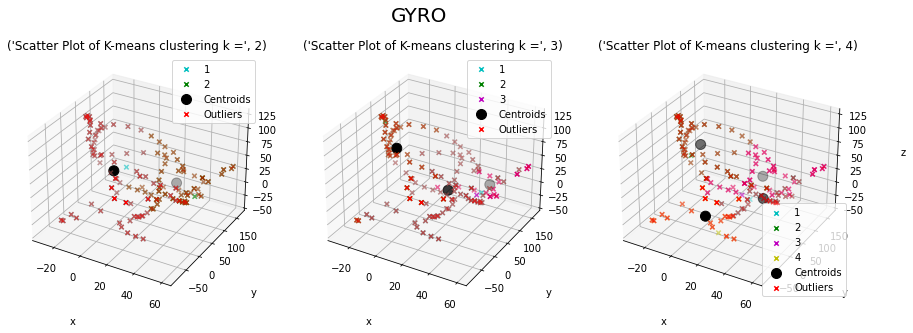

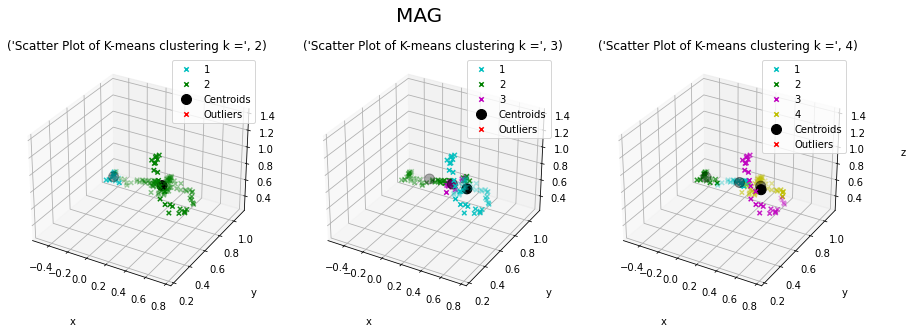

CS and Talk to Walk and Talk


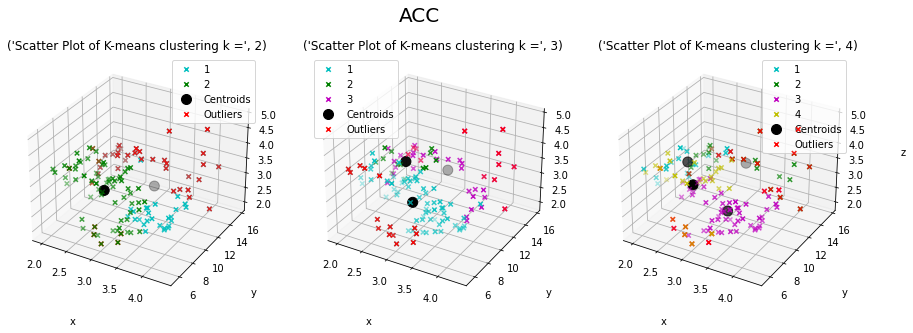

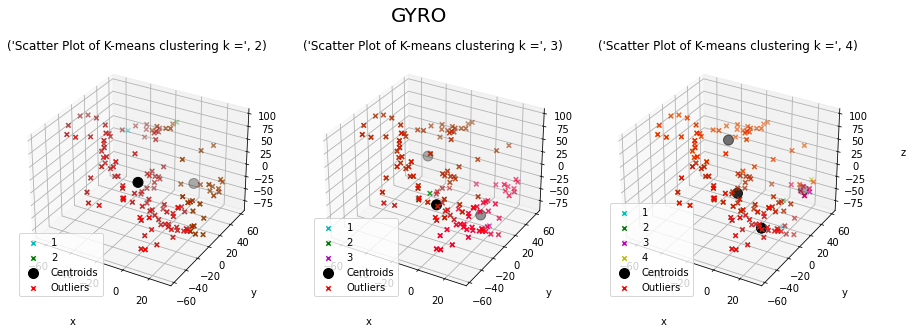

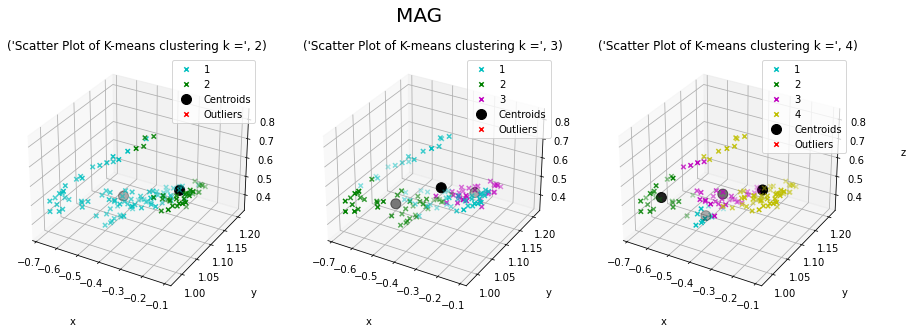

In [13]:
def outliers_kMeans(data):
    k_values = [2, 3, 4] 
    res = []
    colors = np.array(['c','g','m','y'])

    for act in range(len(activity_labels[0:])): # para cada atividade
        print(activity_labels[act])
        
        for vector in sensors: # para cada vector
            if(vector == 'GYR'):
                vector = 'GYRO'

            # figura para vector
            fig, axs = plt.subplots(1,3,figsize =(15,5),subplot_kw=dict(projection='3d'))
            fig.suptitle(vector, fontsize=20)
            
            j=0
            for k in k_values: # para cada valor k
                data_act = data.loc[data['Label'] == act+1]
                
                # Criamos um novo array para ser enviar para o K-means
                new_data = data_act[[vector+'_X', vector+'_Y', vector+'_Z']]
                new_data = new_data.rename(columns={vector+'_X':'x', vector+'_Y':'y', vector+'_Z':'z'}) # renomeia as colunas para ser usado na função do K-means

                [new_data, centroids] = k_means(new_data, k)
                
                # Gráfico
                axs[j].grid()
                
                for i in range(k): # percorre cada cluster
                    # Pontos pertencentes ao cluster i
                    x = new_data['x'].loc[new_data['Clusters'] == i]
                    y = new_data['y'].loc[new_data['Clusters'] == i]
                    z = new_data['z'].loc[new_data['Clusters'] == i]
                    
                    axs[j].scatter(x,y,z,marker = 'x',zorder=2,color=colors[i], label=(i+1))
                    
                    
                # Centroids 
                axs[j].scatter([item[0] for item in centroids],[item[1] for item in centroids],[item[2] for item in centroids], c='k',marker = 'o', s=10**2, label='Centroids')

                # Find outliers
                threshold = 2 # Se a distância do ponto ao centroid do seu cluster for maior que este threshold, o ponto é considerado um outlier
                # Outliers = todos que possuem a distância maior que o threshold
                outliers = new_data.loc[new_data['Distance'] > threshold] # Inspiration: https://medium.datadriveninvestor.com/outlier-detection-with-k-means-clustering-in-python-ee3ac1826fb0
                axs[j].scatter(outliers['x'], outliers['y'], outliers['z'], c='r',marker = 'x', label='Outliers')
                
                str = 'Scatter Plot of K-means clustering k =',(i+1)
                axs[j].set_title(str)   
                axs[j].set_xlabel('x', labelpad=20)
                axs[j].set_ylabel('y', labelpad=20)
                axs[j].set_zlabel('z', labelpad=20)
                axs[j].legend()
                
                j+=1
                #break
            plt.show()
            plt.close()
            #break
        #break
                     
outliers_kMeans(data)

<h2> Exercicio 3.8 </h2>

In [14]:
def outlier_inj(data,x, k=3):
    out_inj_df = pd.DataFrame(columns=["Interaction", "Outliers Count", "Outliers Density"])

    data = data.copy() # fazemos uma cópia do array

    interaction = 1
    max_int = 10

    outliers, not_outliers = zScore(data,k)
    d = (len(outliers)/len(data)) * 100

    out_inj_df = out_inj_df.append({'Interaction': 'Initial', 'Outliers Count': len(outliers), 'Outliers Density': d}, ignore_index=True)
    #return out_inj_df

    while((d < x) & (interaction <= max_int)): # Enquanto a densidade for inferior a x
        #print(interaction, ':',d,' - ', x)
        out_inj_df = out_inj_df.append({'Interaction': interaction, 'Outliers Count': len(outliers), 'Outliers Density': d}, ignore_index=True)

        # Sorteia (x-d)% dos pontos não outliers
        d_x = x - d
        num_inj = int(np.ceil(len(data)*d_x/100))
        data_inj = not_outliers.sample(num_inj) # Sorteia de forma aleatória

        mean = data.mean()
        std = data.std()

        z = abs(max(outliers) - (mean + k*std)) # Amplitude máxima do outlier
        
        # Transformamos cada ponto tal que p = mean + s * k * (std + q)
        for index, value in data_inj.items(): 
            #s = np.random.uniform(-1,1) # Variável escolhida de forma aleatória usando uma distribuição uniforme
            s = np.random.randint(2)
            if s == 0:
                s = -1
            q = np.random.uniform(0,z) # Variável aleatória uniforme no intervalo q E [0,z[
            
            # Transformamos o ponto
            data[index] = mean + s*k*(std + q)
        
        outliers, not_outliers = zScore(data,k) # Identifica novamente os outliers depois da injeção do novo outlier
        d = len(outliers)/len(data) * 100
        interaction+=1

    out_inj_df = out_inj_df.append({'Interaction': 'Final', 'Outliers Count': len(outliers), 'Outliers Density': d}, ignore_index=True)
    return [data, out_inj_df]
    
outlier_inj((transformed_data.get(activity_labels[0])[sensors[0]]),10)[1] # Exemplo

Interaction Outliers Count  Outliers Density
0      Initial            128          1.162368
1            1            128          1.162368
2            2            495          4.495096
3            3            363          3.296404
4            4            423          3.841264
5            5            386          3.505267
6            6            393          3.568834
7            7            391          3.550672
8            8            380          3.450781
9            9            375          3.405376
10          10            373          3.387214
11       Final            404          3.668725

<h1> Exercicio 4.1 </h1>


Activity:  Stand
KS statistic ACC:  0.2795907823870122
KS statistic GYR:  0.35907102112466843
KS statistic MAG:  0.1636752922261062
P value ACC:  0
P value:  0
P value MAG:  0


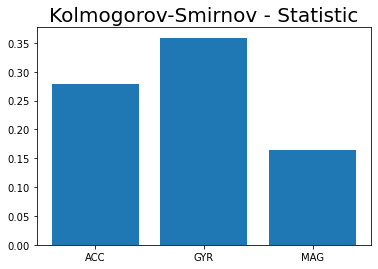

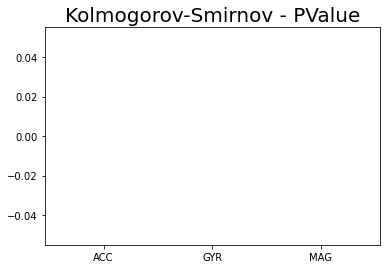


Activity:  Sit
KS statistic ACC:  0.1288575138377499
KS statistic GYR:  0.2755456731761314
KS statistic MAG:  0.1071804464276187
P value ACC:  0
P value:  0
P value MAG:  0


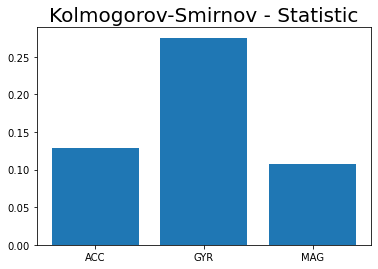

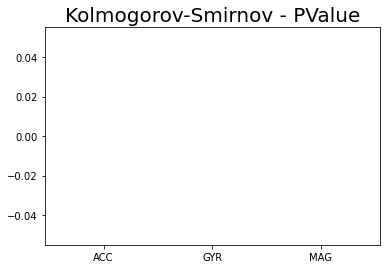


Activity:  Sit and Talk
KS statistic ACC:  0.14310682601667715
KS statistic GYR:  0.14576745660008572
KS statistic MAG:  0.02488899393746935
P value ACC:  0
P value:  0
P value MAG:  0


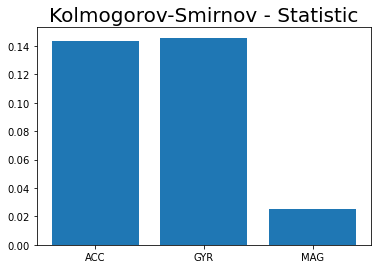

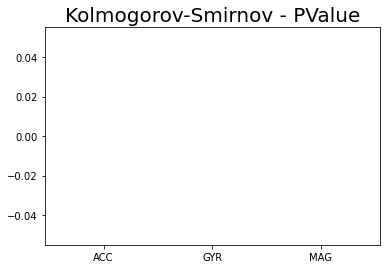


Activity:  Walk
KS statistic ACC:  0.08131124352023289
KS statistic GYR:  0.03287518762363122
KS statistic MAG:  0.07612379493227234
P value ACC:  0
P value:  0
P value MAG:  0


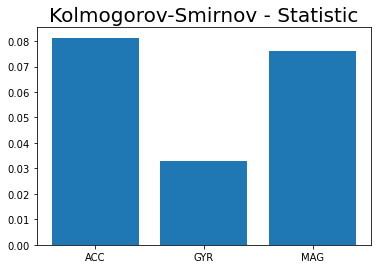

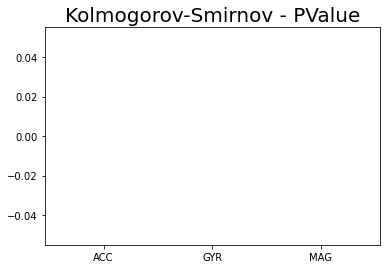


Activity:  Walk and Talk
KS statistic ACC:  0.08524801422565187
KS statistic GYR:  0.03967160370409038
KS statistic MAG:  0.03389542887818317
P value ACC:  0
P value:  0
P value MAG:  0


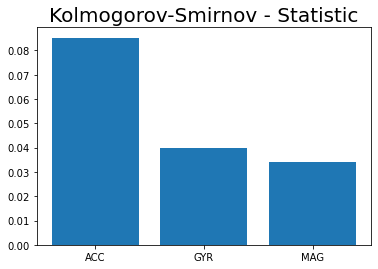

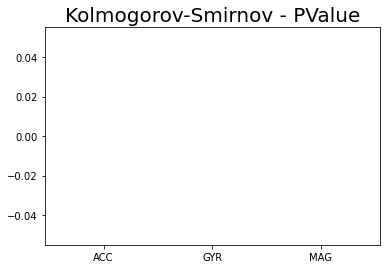


Activity:  Climb Stairs (CS)
KS statistic ACC:  0.09773569079861377
KS statistic GYR:  0.06839815175195596
KS statistic MAG:  0.13872087749885836
P value ACC:  0
P value:  0
P value MAG:  0


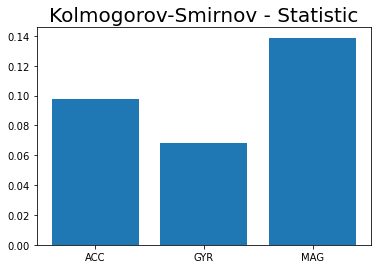

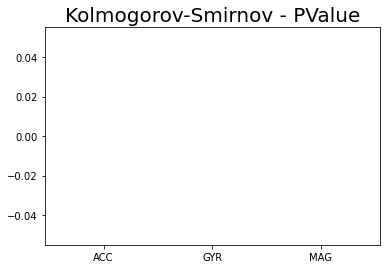


Activity:  CS and Talk
KS statistic ACC:  0.08269954682444558
KS statistic GYR:  0.10000627708484539
KS statistic MAG:  0.13744554405391513
P value ACC:  0
P value:  0
P value MAG:  0


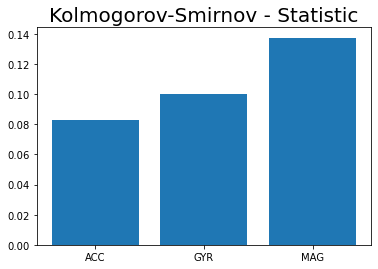

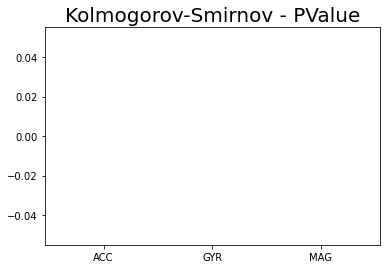


Activity:  Stand to Sit
KS statistic ACC:  0.3023416231762406
KS statistic GYR:  0.28754010160930454
KS statistic MAG:  0.22936577276570624
P value ACC:  0
P value:  0
P value MAG:  0


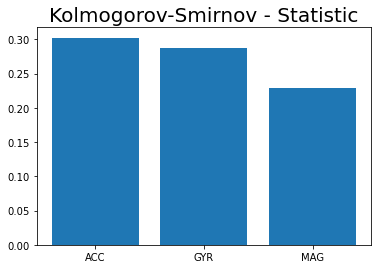

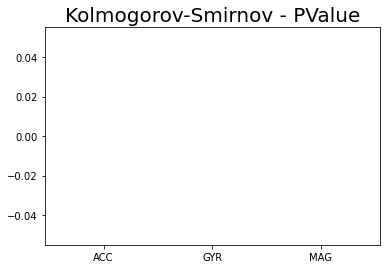


Activity:  Sit to Stand
KS statistic ACC:  0.24193106586752702
KS statistic GYR:  0.3140340857654295
KS statistic MAG:  0.22110272774608575
P value ACC:  0
P value:  0
P value MAG:  0


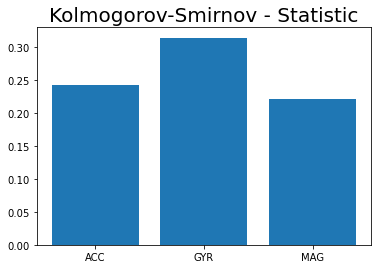

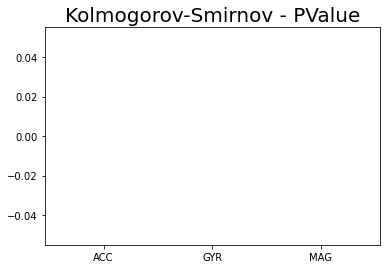


Activity:  Stand to Sit and Talk
KS statistic ACC:  0.32346547514398893
KS statistic GYR:  0.3190014501876021
KS statistic MAG:  0.3141623648145131
P value ACC:  0
P value:  0
P value MAG:  0


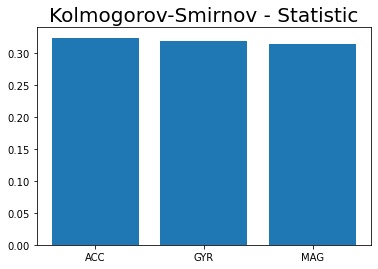

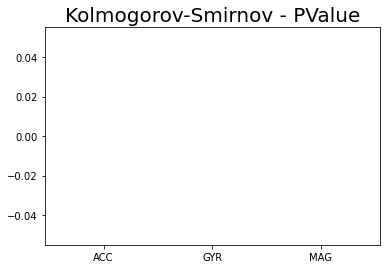


Activity:  Sit to Stand and Talk
KS statistic ACC:  0.20419181117279217
KS statistic GYR:  0.229053579078834
KS statistic MAG:  0.2533746448380708
P value ACC:  0
P value:  0
P value MAG:  0


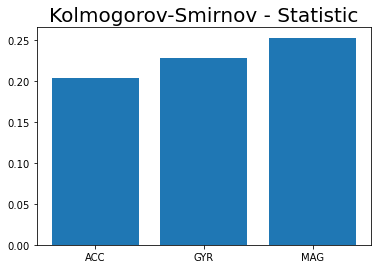

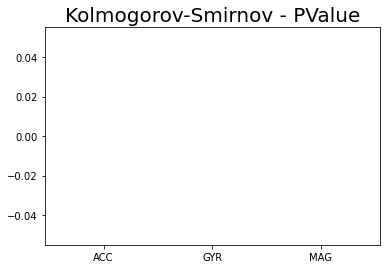


Activity:  Stand to Walk
KS statistic ACC:  0.09616535314530983
KS statistic GYR:  0.10142962298624997
KS statistic MAG:  0.05044376672790926
P value ACC:  0
P value:  0
P value MAG:  0.5212769919788116


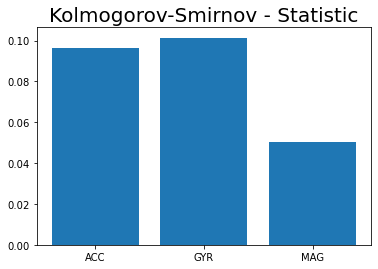

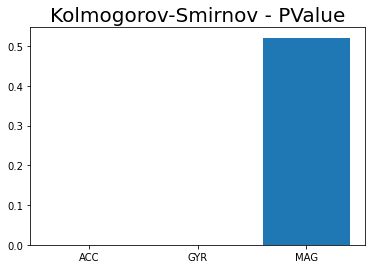


Activity:  Walk to Stand
KS statistic ACC:  0.057361866333914935
KS statistic GYR:  0.08737271408319802
KS statistic MAG:  0.28481361771644637
P value ACC:  0.06793688835691536
P value:  0
P value MAG:  0


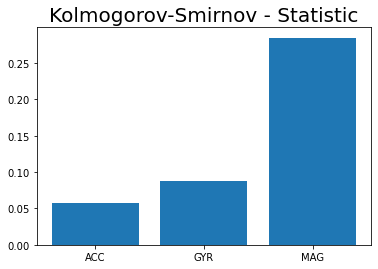

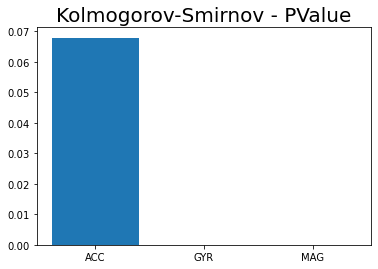


Activity:  Stand to CS/CS and Talk
KS statistic ACC:  0.09153533126497793
KS statistic GYR:  0.07972226942563831
KS statistic MAG:  0.14550275070266083
P value ACC:  0
P value:  0.07497970888981953
P value MAG:  0


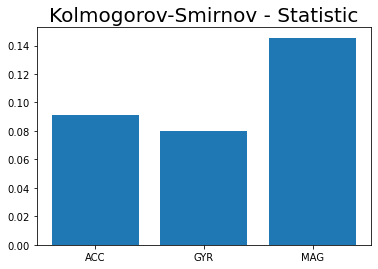

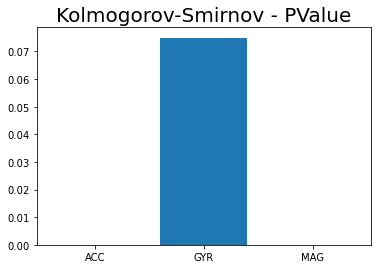


Activity:  CS to Walk
KS statistic ACC:  0.0696944563820826
KS statistic GYR:  0.09021505827655962
KS statistic MAG:  0.2400632746182786
P value ACC:  0.544605444045589
P value:  0.23785781357950442
P value MAG:  0


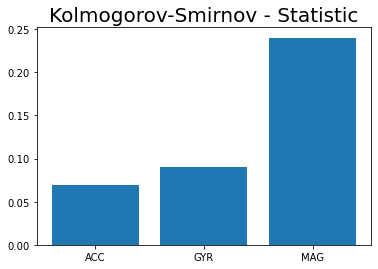

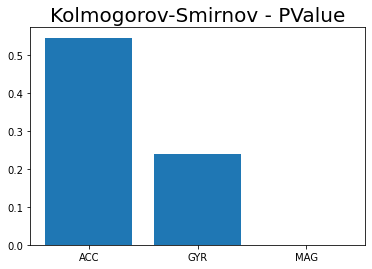


Activity:  CS and Talk to Walk and Talk
KS statistic ACC:  0.12484331413730643
KS statistic GYR:  0.042760926033490465
KS statistic MAG:  0.0922447790279668
P value ACC:  0
P value:  0.9666574386116521
P value MAG:  0.2162573285249507


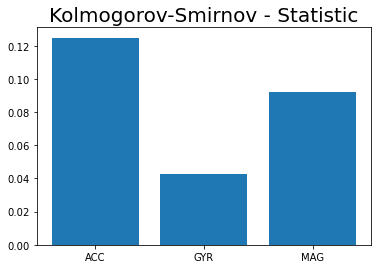

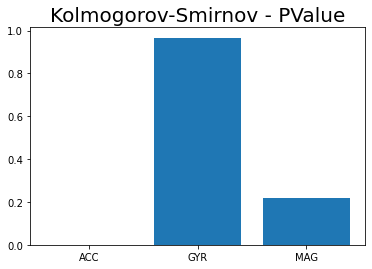

In [12]:
def Kolsmirnov(data):
    df = data.copy()
    for i in activity_labels[0:]:
        acts = data[i]
        df_acc = df[i]['ACC']
        df_gyr = df[i]['GYR']
        df_mag = df[i]['MAG']
    
        ks_stats_acc, p_value_acc = stats.kstest(df_acc, 'norm', (df_acc.mean(), df_acc.std()))
        ks_stats_gyr, p_value_gyr = stats.kstest(df_gyr, 'norm', (df_gyr.mean(), df_gyr.std()))
        ks_stats_mag, p_value_mag = stats.kstest(df_mag, 'norm', (df_mag.mean(), df_mag.std()))
        
        if p_value_acc < 0.05:
            p_value_acc = 0
        
        if p_value_gyr < 0.05:
            p_value_gyr = 0
        
        if p_value_mag < 0.05:
            p_value_mag = 0
        
        ks_values = {'ACC': ks_stats_acc, 'GYR': ks_stats_gyr, 'MAG': ks_stats_mag}
        p_values = {'ACC': p_value_acc, 'GYR': p_value_gyr, 'MAG': p_value_mag}
        
        print('\nActivity: ',i)
        print('KS statistic ACC: ', ks_stats_acc)
        print('KS statistic GYR: ', ks_stats_gyr)
        print('KS statistic MAG: ', ks_stats_mag)
        print('P value ACC: ', p_value_acc)
        print('P value: ', p_value_gyr)
        print('P value MAG: ', p_value_mag)
        
        plt.title("Kolmogorov-Smirnov - Statistic", fontsize=20)
        plt.bar(ks_values.keys(),ks_values.values())
        plt.show()
        
        plt.title("Kolmogorov-Smirnov - PValue", fontsize=20)
        plt.bar(p_values.keys(),p_values.values())
        plt.show()
        
Kolsmirnov(transformed_data)

In [13]:
data_act = data.loc[data['Label'] == 1]
data_act['Window'] = -1
data_act
teste = []
teste += [1,2,3]
teste += [5,9]
teste
oi = stats.iqr(data_act["ACC_X"])
oi
sensors[0]

'ACC'

<h1> Exercicio 4.2 </h1>
<p>https://eudl.eu/pdf/10.4108/icst.bodynets.2011.247018</p>
<p> Após leitura do artigo dá para definir dois principais tipos de features </p>
<p> Estas são: </p>
<ul>
    <li>Statistical</li>
        <ul>
            <li> Mean </li>
            <li> Median </li>
            <li> STD </li>
            <li> Var </li>
            <li> RMS </li>
            <li> Averaged derivatives </li>
            <li> Skewness </li>
            <li> Kurtosis </li>
            <li> Interquartile Range </li>
            <li> Zero Crossing Rate </li>
            <li> Mean Crossing Rate </li>
            <li> Pairwise Correlation </li>
            <li> Spectral Entropy  --> https://raphaelvallat.com/entropy/build/html/generated/entropy.spectral_entropy.html</li>
        </ul>
    <li>Fisicas</li>
        <ul>
            <li> Movement Intensity </li>
            <li> Normalized Signal Magnitude Area </li>
            <li> Eigenvalues of Dominant Directions </li>
            <li>Correlation between Acceleration along Grav- ity and Heading Directions </li>
            <li> Averaged Velocity along Heading Direction </li>
            <li> Averaged Rotation Angles related to Gravity Direction </li>
            <li> Dominant Frequency </li>
            <li> Energy </li>
            <li> Averaged Acceleration Energy </li>
            <li> Averaged Rotation Energy </li>
        </ul>
</ul>

<h1> Statistical Features </h1>

In [14]:
def mean(window,sens):
    x = window[sens + '_X'].mean()
    y = window[sens + '_Y'].mean()
    z = window[sens + '_Z'].mean()
    return [x, y, z]

def median(window,sens):
    x = window[sens + '_X'].median()
    y = window[sens + '_Y'].median()
    z = window[sens + '_Z'].median()
    return [x, y, z]

def std(window,sens):
    x = window[sens + '_X'].std()
    y = window[sens + '_Y'].std()
    z = window[sens + '_Z'].std()
    return [x, y, z]

def variance(window,sens):
    x = window[sens + '_X'].var()
    y = window[sens + '_Y'].var()
    z = window[sens + '_Z'].var()
    return [x, y, z]

def rms(window,sens):
    x = ((window[sens + '_X'] ** 2).sum())
    x_1 = window.shape[0]**0.5
    y = ((window[sens + '_Y'] ** 2).sum())
    y_1 = window.shape[0]**0.5
    z = ((window[sens + '_Z'] ** 2).sum())
    z_1 = window.shape[0]**0.5
    return [x/x_1, y/y_1, z/z_1]

def ad(window,sens):
    x = window[sens + '_X'].diff() * f
    x_total = x.sum() / x.shape[0]
    y = window[sens + '_Y'].diff() * f
    y_total = y.sum() / x.shape[0]
    z = window[sens + '_Z'].diff() * f
    z_total = z.sum() / x.shape[0]
    
    return [x_total, y_total, z_total]

def skew(window,sens):
    x = window[sens + '_X'].skew()
    y = window[sens + '_Y'].skew()
    z = window[sens + '_Z'].skew()
    return [x, y, z]

def kurt(window,sens):
    x = window[sens + '_X'].kurtosis()
    y = window[sens + '_Y'].kurtosis()
    z = window[sens + '_Z'].kurtosis()
    return [x, y, z]

def iqr(window,sens):
    x_high = window[sens + '_X'].quantile(0.75) 
    y_high = window[sens + '_Y'].quantile(0.75) 
    z_high = window[sens + '_Z'].quantile(0.75) 
    x_low = window[sens + '_X'].quantile(0.25)
    y_low = window[sens + '_Y'].quantile(0.25)
    z_low = window[sens + '_Z'].quantile(0.25)
    return [x_high - x_low, y_high-y_low, z_high-z_low]

def zcr(window,sens):
    x_zcr = 0
    y_zcr = 0
    z_zcr = 0
    
    for i in range(len(window.index)-1):
        index1 = window.index[i]
        index2 = window.index[i+1]
        first_x = window[sens + '_X'][index1]
        last_x = window[sens + '_X'][index2]
        first_y = window[sens + '_Y'][index1]
        last_y = window[sens + '_Y'][index2]
        first_z = window[sens + '_Z'][index1]
        last_z = window[sens + '_Z'][index2]
        if(((first_x) * (last_x)) < 0):
            x_zcr += 1
        if(((first_y) * (last_y)) < 0):
            y_zcr += 1
        if(((first_z) * (last_z)) < 0):
            z_zcr += 1

    return [x_zcr, y_zcr, z_zcr]

def mcr(window,sens):
    x_mcr = 0
    y_mcr = 0
    z_mcr = 0
    
    [x_mean,y_mean,z_mean] = mean(window,sens)
    
    for i in range(len(window.index)-1):
        index1 = window.index[i]
        index2 = window.index[i+1]
        first_x = (window[sens + '_X'][index1] - x_mean)
        last_x = (window[sens + '_X'][index2] - x_mean)
        first_y = (window[sens + '_Y'][index1] - y_mean)
        last_y = (window[sens + '_Y'][index2] - y_mean)
        first_z = (window[sens + '_Z'][index1] - z_mean)
        last_z = (window[sens + '_Z'][index2] - z_mean)
        if(((first_x) * (last_x)) < 0):
            x_mcr += 1
        if(((first_y) * (last_y)) < 0):
            y_mcr += 1
        if((first_z) * ((last_z))):
            z_mcr += 1
            
    return [x_mcr, y_mcr, z_mcr]
    
def par_corr(window):
    corr_df = window.corr()
    cols = corr_df.columns
    
    corr = []
    for i in range(cols.shape[0]):
        for j in range(i+1,cols.shape[0]):
            corr.append(corr_df[cols[i]][cols[j]])
            
    return corr

def spectral_entropy(x, sf=f, method='fft', nperseg=None, normalize=False):
    x = np.array(x)
    if method == 'fft':
        _, psd = periodogram(x, sf)
    elif method == 'welch':
        _, psd = welch(x, sf, nperseg=nperseg)
    psd_norm = np.divide(psd[np.where(psd != 0)], psd.sum())
    se = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
    if normalize:
        se /= np.log2(psd_norm.size)
    return se

def spec_ent(window,vec_name):
    x = spectral_entropy(window[vec_name + '_X'])
    y = spectral_entropy(window[vec_name + '_Y'])
    z = spectral_entropy(window[vec_name + '_Z'])
    return [x, y, z]

<h1> Physical Features </h1>

In [15]:
def mi(window,sens):
    x = window[sens + '_X']**2
    y = window[sens + '_Y']**2
    z = window[sens + '_Z']**2
    mi = np.sqrt(x + y + z)
    
    ai = mi.sum()
    ai_fim = ai / mi.shape[0]
    vi= ((mi - ai)**2).sum()
    vi_fim = vi / mi.shape[0]
    return [ai_fim,vi_fim]

def nor_sig(window,sens):
    x = window[sens + '_X'].abs()
    y = window[sens + '_Y'].abs()
    z = window[sens + '_Z'].abs()
    window['total'] = x + y +z 
    shape = window.shape[0]
    sma = window['total'].sum()
    sma_fim = sma / shape
    return [sma]

def eva(window,sens):
    x_cov = window[[sens + '_X',sens + '_Y',sens + '_Z']].cov()
    lina = np.linalg.eig(x_cov)[0]
    eig_values = sorted(lina)
    
    return [eig_values[-1],eig_values[-2]]
      
def cagh(window,sens):
    sensor_y = window[sens + '_Y']**2
    sensor_z = window[sens + '_Z']**2
    heading = np.sqrt(sensor_y + sensor_z)
    gravity = window[sens + '_X']
    df_fim = pd.DataFrame([heading,gravity]).transpose()
    corr = par_corr(df_fim) 
    return corr

def velocity(window,sens):
    v_x = []
    v_y = []
    v_z = []
    x = window[sens + '_X']
    y = window[sens + '_Y']
    z = window[sens + '_Z']
    extra = (2 * f)
    for i in range(len(window.index)-1):
        index1 = window.index[i]
        index2 = window.index[i+1]
        
        v_x.append((x[index1] + x[index2]) / extra)
        v_y.append((y[index1] + y[index2]) / extra)
        v_z.append((z[index1] + z[index2]) / extra)
        
    return [v_x,v_y,v_z]

def avh(window,sens):
    [v_x, v_y, v_z] = velocity(window,sens)
    y_power = np.power(v_y,2)
    z_power = np.power(v_z,2)
    v_h = np.sqrt(y_power + z_power)
    v_fim = np.mean(v_h)
    return [v_fim]

def avg(window,sens):
    [v_x, v_y, v_z] = velocity(window,sens)
    v_fim_avg = np.mean(v_x)
    return [v_fim_avg]

def dom_freq(window,vec_name):
    freqs, x = signal.welch(window[vec_name + '_X'], f)
    max_x = freqs[x.argmax()]
    
    freqs, y = signal.welch(window[vec_name + '_Y'], f)
    max_y = freqs[y.argmax()]
    
    freqs, z = signal.welch(window[vec_name + '_Z'], f)
    max_z = freqs[z.argmax()]
    
    return [max_x,max_y,max_z]

def energy(window,vec_name):
    freqs, x = signal.welch(window[vec_name + '_X'], f)
    mean_x = np.mean(x)
    
    freqs, y = signal.welch(window[vec_name + '_Y'], f)
    mean_y = np.mean(y)
    
    freqs, z = signal.welch(window[vec_name + '_Z'], f)
    mean_z = np.mean(y)
    
    return [mean_x,mean_y,mean_z,(mean_x + mean_y + mean_z) / 3]

In [16]:
################## EX 4.2 #########################
#https://eudl.eu/pdf/10.4108/icst.bodynets.2011.247018
def calculate(data,T,f):
    step = int(f*T)
    int_calc = step/2
    all_features = []
    for sens in sensors:
        all_values = []
        print(sens)
        for act in range(1,17):
            data_act = data.loc[data['Label'] == act]
            for i in range(0,data_act.shape[0] - int(int_calc),int(int_calc)):
                values = []
                teste = []
                window = data_act[[sens + '_X',sens + '_Y',sens + '_Z']].iloc[i:i+step]
                
                if(sens == sensors[0]):
                    values += [activity_labels[act-1]]
                values += mean(window, sens)
                values += median(window,sens)
                values += std(window,sens)
                values += variance(window,sens)
                values += rms(window, sens)
                values += ad(window, sens)
                values += skew(window,sens)
                values += kurt(window,sens)
                values += iqr(window,sens)
                values += zcr(window, sens)
                values += mcr(window,sens)
                values += par_corr(window)
                values += spec_ent(window,sens)
                
                ######################## Physical ##############
        
                if(sens == 'ACC'):
                    values += mi(window,sens)
                    values += nor_sig(window,sens)
                    values += eva(window,sens)
                    values += cagh(window,sens)
                    values += avh(window,sens)
                    values += avg(window,sens)
                elif(sens == 'GYRO' or sens == 'MAG'):
                    values += cagh(window,sens)
                values += dom_freq(window,sens)
                if(sens == 'ACC' or sens == 'GYRO'):
                    values += energy(window,sens)
                all_values.append(values)
                
        tudo = pd.DataFrame(all_values)
        #print(tudo.shape[1])
        
        estatistico = [sens + 'X_Mean',
                       sens + 'Y_Mean',
                       sens + 'Z_Mean',
                       sens + 'X_Median',
                       sens + 'Y_Median',
                       sens + 'Z_Median',
                       sens + 'X_STD',
                       sens + 'Y_STD',
                       sens + 'Z_STD',
                       sens + 'X_Var',
                       sens + 'Y_Var',
                       sens + 'Z_Var',
                       sens + 'X_Rms',
                       sens + 'Y_Rms',
                       sens + 'Z_Rms',
                       sens + 'X_AD',
                       sens + 'Y_AD',
                       sens + 'Z_AD',
                       sens + 'X_Skew',
                       sens + 'Y_Skew',
                       sens + 'Z_Skew',
                       sens + 'X_Kurt',
                       sens + 'Y_Kurt',
                       sens + 'Z_Kurt',
                       sens + 'X_IQR',
                       sens + 'Y_IQR',
                       sens + 'Z_IQR',
                       sens + 'X_ZCR',
                       sens + 'Y_ZCR',
                       sens + 'Z_ZCR',
                       sens + 'X_MCR',
                       sens + 'Y_MCR',
                       sens + 'Z_MCR',
                       sens + 'X_Par',
                       sens + 'Y_Par',
                       sens + 'Z_Par',
                       sens + 'X_Spectral',
                       sens + 'Y_Spectral',
                       sens + 'Z_Spectral',
                      ]
        
        if (sens == 'ACC'):
            fisico = [ sens + '_AI',
                       sens + '_VI',
                       sens + '_SMA',
                       sens + '_EVA_1',
                       sens + '_EVA_2',
                       sens + '_CAGH',
                       sens + '_AVH',
                       sens + '_AVG',
                     ]
        elif (sens == 'GYRO' or sens == 'MAG'):
            fisico = [ sens + '_CAGH',
                     ]
            
        fisico_v2 = [sens + 'X_DF',
                  sens + 'Y_DF',
                  sens + 'Z_DF',]
        if(sens == 'ACC'):
            fisico_v2 += [sens + 'X_Energy',
                       sens + 'Y_Energy',
                       sens + 'Z Energy',
                       sens + '_AAE']
        elif(sens == 'GYRO'):
            fisico_v2 += [sens + 'X_Energy',
                       sens + 'Y_Energy',
                       sens + 'Z_Energy',
                       sens + '_ARE']
        
        columns = []
        if(sens == sensors[0]):
            columns = ['Actividade']
        columns += estatistico + fisico + fisico_v2
        tudo.columns = columns
        all_features.append(tudo)
        
    labels = pd.DataFrame(all_features[0])
    features = pd.concat([labels]+all_features,axis=1)    
    return features

In [17]:
features = calculate(data,T,f)

ACC
GYRO
MAG


<h1> Normalize Data </h1>

In [18]:
def normalize(data):
    for column in data:
        data[column] = (data[column] - data[column].mean())/data[column].std()
    
    return data

In [19]:
features_geral = pd.DataFrame(features)
features_geral

Actividade  ACCX_Mean  ACCY_Mean  ACCZ_Mean  \
0                            Stand   2.816928   9.085446   3.060974   
1                            Stand   2.864813   9.022365   3.207150   
2                            Stand   2.646591   9.056402   3.260619   
3                            Stand   2.212950   9.213938   3.152237   
4                            Stand   2.058188   9.264358   3.125986   
...                            ...        ...        ...        ...   
1021       Stand to CS/CS and Talk   2.808918   9.357957   2.614294   
1022                    CS to Walk   3.383485   9.397466   2.440642   
1023                    CS to Walk   3.201042   9.266270   2.381136   
1024  CS and Talk to Walk and Talk   3.118584   9.046212   3.081886   
1025  CS and Talk to Walk and Talk   3.199029   9.138746   3.241234   

      ACCX_Median  ACCY_Median  ACCZ_Median  ACCX_STD  ACCY_STD  ACCZ_STD  \
0         2.81290      9.09570      3.03500  0.081657  0.062883  0.096789   
1         2.86200      9.01775      3.25270  0.088376  0.091226  0.153359   
2         2.80950      8.99730      3.27810  0.347139  0.150020  0.101686   
3         2.09150      9.25250      3.15010  0.285796  0.151556  0.086273   
4         2.05515      9.26515      3.11190  0.102485  0.096136  0.062373   
...           ...          ...          ...       ...       ...       ...   
1021      2.93850      9.02280      2.61240  0.744760  2.174059  0.900325   
1022      3.58965      9.30635      2.61035  1.062299  1.183010  1.249714   
1023      3.48910      9.43810      2.32795  1.266753  1.004640  1.146547   
1024      3.13485      8.58785      3.05820  0.614163  2.090657  0.639647   
1025      3.20160      8.85645      3.20965  0.564650  1.377403  0.697399   

      ...  MAGX_Par  MAGY_Par  MAGZ_Par  MAGX_Spectral  MAGY_Spectral  \
0     ...  0.539329 -0.325058 -0.232679       5.011179       4.426497   
1     ...  0.707856 -0.695161 -0.540715       3.474447       3.836698   
2     ... -0.809210 -0.959026  0.895965       2.674743       2.903249   
3     ... -0.638503 -0.941737  0.789690       2.106325       3.553121   
4     ...  0.610120  0.133675  0.402634       4.912554       4.816621   
...   ...       ...       ...       ...            ...            ...   
1021  ... -0.593900 -0.831713  0.133123       1.881379       1.873946   
1022  ... -0.363727  0.825438 -0.343870       2.758594       4.009823   
1023  ... -0.876472  0.728365 -0.912624       1.212355       1.262079   
1024  ...  0.327046  0.579922 -0.404250       1.824213       3.187210   
1025  ...  0.570309  0.305204  0.269035       0.461518       3.477595   

      MAGZ_Spectral  MAG_CAGH   MAGX_DF    MAGY_DF   MAGZ_DF  
0          3.893907  0.171946  1.003922  19.074510  0.000000  
1          1.934080 -0.328610  0.501961   0.501961  0.501961  
2          2.505226 -0.929123  0.501961   0.501961  0.501961  
3          2.124870 -0.881967  0.501961   0.501961  0.501961  
4          4.888723  0.489353  0.501961  19.074510  0.501961  
...             ...       ...       ...        ...       ...  
1021       1.414095 -0.913825  0.506931   0.506931  0.506931  
1022       2.969073  0.058309  0.501961   1.003922  1.505882  
1023       2.037967  0.022021  0.673684   0.673684  0.673684  
1024       1.397404  0.737531  1.003922   0.501961  0.501961  
1025       2.979206  0.470668  0.673684   0.673684  0.673684  

[1026 rows x 200 columns]

In [28]:
Atividades_trans = features_geral['Actividade']
Atividades_save = Atividades_trans.T.drop_duplicates().T
Atividades_save

Actividade
0                            Stand
1                            Stand
2                            Stand
3                            Stand
4                            Stand
...                            ...
1021       Stand to CS/CS and Talk
1022                    CS to Walk
1023                    CS to Walk
1024  CS and Talk to Walk and Talk
1025  CS and Talk to Walk and Talk

[1026 rows x 1 columns]

In [30]:
features_fixed = features_geral.T.drop_duplicates().T
features_end = normalize(features_fixed.iloc[:,1:])
features_end_v1 = features_end.dropna(axis=1, how='all')
features_final = features_end_v1.dropna()
features_final['Atividade'] = Atividades_save['Actividade']
features_final

ACCX_Mean ACCY_Mean ACCZ_Mean ACCX_Median ACCY_Median ACCZ_Median  \
0     0.668676  0.506106 -0.532674    0.670976    0.574562   -0.538129   
1     0.706968  0.484433 -0.481779    0.710458    0.547105   -0.462564   
2      0.53246  0.496127 -0.463162    0.668242    0.539901   -0.453747   
3     0.185684  0.550254 -0.500898    0.090887    0.629793   -0.498177   
4     0.061923  0.567577 -0.510038    0.061657    0.634248   -0.511436   
...        ...       ...       ...         ...         ...         ...   
1021   0.66227  0.599736 -0.688199    0.771973    0.548883   -0.684817   
1022  1.121742  0.613311  -0.74866    1.295573    0.648761   -0.685528   
1023  0.975845  0.568234 -0.769379    1.214719    0.695168   -0.783551   
1024  0.909905  0.492626 -0.525393    0.929861    0.395677   -0.530076   
1025  0.974236  0.524419 -0.469911    0.983536    0.490289   -0.477507   

      ACCX_STD  ACCY_STD  ACCZ_STD  ACCX_Var  ...  MAGY_Par  MAGZ_Par  \
0    -0.821955  -0.97092 -0.839211 -0.362699  ...   -0.6987 -0.396724   
1     -0.80736 -0.933711 -0.727558 -0.361704  ... -1.460998 -0.919967   
2    -0.245202 -0.856528 -0.829546 -0.263593  ...  -2.00448  1.520441   
3     -0.37847 -0.854513 -0.859967 -0.297395  ... -1.968869  1.339917   
4    -0.776707 -0.927265 -0.907137  -0.35936  ...  0.246149  0.682448   
...        ...       ...       ...       ...  ...       ...       ...   
1021  0.618618  1.800562  0.746736  0.114384  ... -1.742253  0.224643   
1022  1.308465  0.499546   1.43633   0.61394  ...   1.67097 -0.585598   
1023  1.752636  0.265388  1.232708  1.028502  ...  1.471029 -1.551708   
1024  0.334899  1.691076  0.232235 -0.040121  ...  1.165282 -0.688162   
1025  0.227335  0.754739  0.346219 -0.090933  ...  0.599448   0.45551   

     MAGX_Spectral MAGY_Spectral MAGZ_Spectral  MAG_CAGH   MAGX_DF   MAGY_DF  \
0         1.340988      0.707621      0.550887  0.557662 -0.436008  1.409358   
1         0.309362      0.312059     -0.727729 -0.397265 -0.509582 -0.794346   
2        -0.227488      -0.31398     -0.355106 -1.542881 -0.509582 -0.794346   
3        -0.609074      0.121871     -0.603255  -1.45292 -0.509582 -0.794346   
4          1.27478      0.969267      1.199917  1.163188 -0.509582  1.409358   
...            ...           ...           ...       ...       ...       ...   
1021     -0.760083     -1.004307     -1.066973 -1.513697 -0.508853 -0.793757   
1022     -0.171198      0.428169     -0.052487  0.340873 -0.509582 -0.734787   
1023     -1.209207      -1.41467     -0.659951  0.271645 -0.484412 -0.773971   
1024     -0.798459     -0.123535     -1.077863  1.636646 -0.436008 -0.794346   
1025     -1.713252      0.071218     -0.045875  1.127544 -0.484412 -0.773971   

       MAGZ_DF                     Atividade  
0    -0.641983                         Stand  
1    -0.569443                         Stand  
2    -0.569443                         Stand  
3    -0.569443                         Stand  
4    -0.569443                         Stand  
...        ...                           ...  
1021 -0.568725       Stand to CS/CS and Talk  
1022 -0.424362                    CS to Walk  
1023 -0.544626                    CS to Walk  
1024 -0.569443  CS and Talk to Walk and Talk  
1025 -0.544626  CS and Talk to Walk and Talk  

[1026 rows x 141 columns]

In [31]:
list(features_final.columns)

['ACCX_Mean',
 'ACCY_Mean',
 'ACCZ_Mean',
 'ACCX_Median',
 'ACCY_Median',
 'ACCZ_Median',
 'ACCX_STD',
 'ACCY_STD',
 'ACCZ_STD',
 'ACCX_Var',
 'ACCY_Var',
 'ACCZ_Var',
 'ACCX_Rms',
 'ACCY_Rms',
 'ACCZ_Rms',
 'ACCX_AD',
 'ACCY_AD',
 'ACCZ_AD',
 'ACCX_Skew',
 'ACCY_Skew',
 'ACCZ_Skew',
 'ACCX_Kurt',
 'ACCY_Kurt',
 'ACCZ_Kurt',
 'ACCX_IQR',
 'ACCY_IQR',
 'ACCZ_IQR',
 'ACCX_ZCR',
 'ACCY_ZCR',
 'ACCZ_ZCR',
 'ACCX_MCR',
 'ACCY_MCR',
 'ACCZ_MCR',
 'ACCX_Par',
 'ACCY_Par',
 'ACCZ_Par',
 'ACCX_Spectral',
 'ACCY_Spectral',
 'ACCZ_Spectral',
 'ACC_AI',
 'ACC_VI',
 'ACC_SMA',
 'ACC_EVA_1',
 'ACC_EVA_2',
 'ACC_CAGH',
 'ACC_AVH',
 'ACC_AVG',
 'ACCX_DF',
 'ACCY_DF',
 'ACCZ_DF',
 'ACCX_Energy',
 'ACCY_Energy',
 'ACC_AAE',
 'GYROX_Mean',
 'GYROY_Mean',
 'GYROZ_Mean',
 'GYROX_Median',
 'GYROY_Median',
 'GYROZ_Median',
 'GYROX_STD',
 'GYROY_STD',
 'GYROZ_STD',
 'GYROX_Var',
 'GYROY_Var',
 'GYROZ_Var',
 'GYROX_Rms',
 'GYROY_Rms',
 'GYROZ_Rms',
 'GYROX_AD',
 'GYROY_AD',
 'GYROZ_AD',
 'GYROX_Skew',
 'GYROY_

<h1> Statistical Features </h1>
<h2> Mean comparisson </h2>

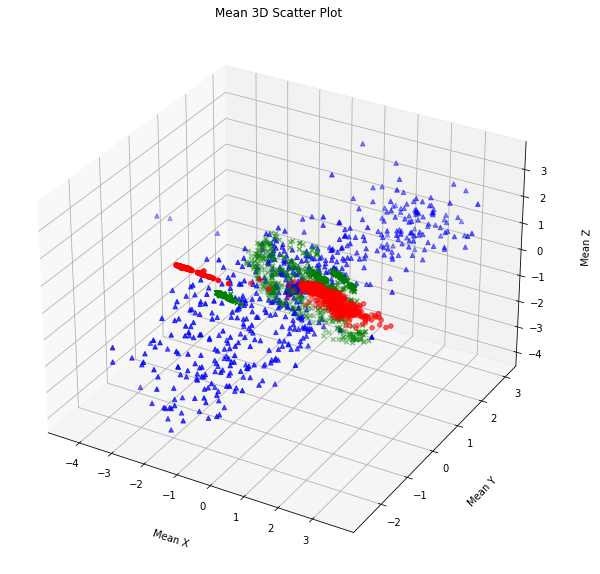

In [32]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_Mean'], features_end['GYROY_Mean'], features_end['GYROZ_Mean'], c='b', marker='^')
ax.scatter(features_end['ACCX_Mean'], features_end['ACCY_Mean'], features_end['ACCZ_Mean'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_Mean'], features_end['MAGY_Mean'], features_end['MAGZ_Mean'], c = 'g', marker = 'x')

ax.set_title('Mean 3D Scatter Plot')

# Set axes label
ax.set_xlabel('Mean X', labelpad=20)
ax.set_ylabel('Mean Y', labelpad=20)
ax.set_zlabel('Mean Z', labelpad=20)

plt.show()

<h2> Median comparisson </h2>

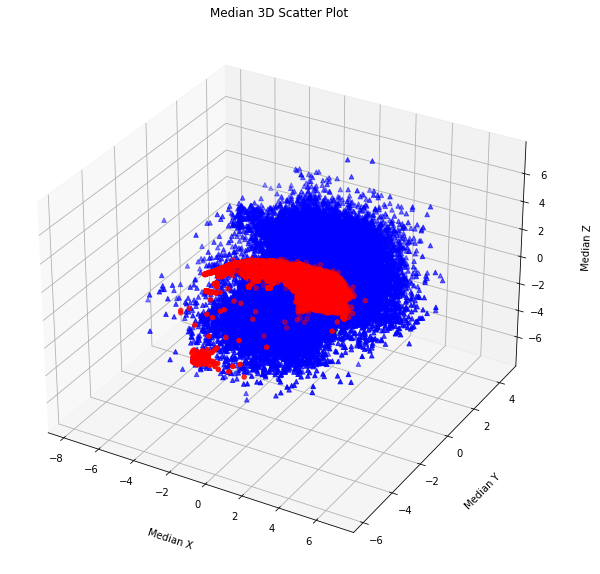

In [181]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_Median'], features_end['GYROY_Median'], features_end['GYROZ_Median'], c='b', marker='^')
ax.scatter(features_end['ACCX_Median'], features_end['ACCY_Median'], features_end['ACCZ_Median'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_Median'], features_end['MAGY_Median'], features_end['MAGZ_Median'], c = 'g', marker = 'x')

ax.set_title('Median 3D Scatter Plot')

# Set axes label
ax.set_xlabel('Median X', labelpad=20)
ax.set_ylabel('Median Y', labelpad=20)
ax.set_zlabel('Median Z', labelpad=20)

plt.show()

<h2> STD comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_STD'], features_end['GYROY_STD'], features_end['GYROZ_STD'], c='b', marker='^')
ax.scatter(features_end['ACCX_STD'], features_end['ACCY_STD'], features_end['ACCZ_STD'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_STD'], features_end['MAGY_STD'], features_end['MAGZ_STD'], c = 'g', marker = 'x')

ax.set_title('STD 3D Scatter Plot')

# Set axes label
ax.set_xlabel('Std X', labelpad=20)
ax.set_ylabel('Std Y', labelpad=20)
ax.set_zlabel('Std Z', labelpad=20)

plt.show()

<h2> Var comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_Var'], features_end['GYROY_Var'], features_end['GYROZ_Var'], c='b', marker='^')
ax.scatter(features_end['ACCX_Var'], features_end['ACCY_Var'], features_end['ACCZ_Var'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_Var'], features_end['MAGY_Var'], features_end['MAGZ_Var'], c = 'g', marker = 'x')

ax.set_title('VAR 3D Scatter Plot')

# Set axes label
ax.set_xlabel('Var X', labelpad=20)
ax.set_ylabel('Var Y', labelpad=20)
ax.set_zlabel('Var Z', labelpad=20)

plt.show()

<h2> RMS comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_Rms'], features_end['GYROY_Rms'], features_end['GYROZ_Rms'], c='b', marker='^')
ax.scatter(features_end['ACCX_Rms'], features_end['ACCY_Rms'], features_end['ACCZ_Rms'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_Rms'], features_end['MAGY_Rms'], features_end['MAGZ_Rms'], c = 'g', marker = 'x')

ax.set_title('RMS 3D Scatter Plot')

# Set axes label
ax.set_xlabel('RMS X', labelpad=20)
ax.set_ylabel('RMS Y', labelpad=20)
ax.set_zlabel('RMS Z', labelpad=20)

plt.show()

<h2> AD comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_AD'], features_end['GYROY_AD'], features_end['GYROZ_AD'], c='b', marker='^')
ax.scatter(features_end['ACCX_AD'], features_end['ACCY_AD'], features_end['ACCZ_AD'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_AD'], features_end['MAGY_AD'], features_end['MAGZ_AD'], c = 'g', marker = 'x')

ax.set_title('AD 3D Scatter Plot')

# Set axes label
ax.set_xlabel('AD X', labelpad=20)
ax.set_ylabel('AD Y', labelpad=20)
ax.set_zlabel('AD Z', labelpad=20)

plt.show()

<h2> Skew comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_Skew'], features_end['GYROY_Skew'], features_end['GYROZ_Skew'], c='b', marker='^')
ax.scatter(features_end['ACCX_Skew'], features_end['ACCY_Skew'], features_end['ACCZ_Skew'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_Skew'], features_end['MAGY_Skew'], features_end['MAGZ_Skew'], c = 'g', marker = 'x')

ax.set_title('Skew 3D Scatter Plot')

# Set axes label
ax.set_xlabel('Skew X', labelpad=20)
ax.set_ylabel('Skew Y', labelpad=20)
ax.set_zlabel('Skew Z', labelpad=20)

plt.show()

<h2> Kurt comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_Kurt'], features_end['GYROY_Kurt'], features_end['GYROZ_Kurt'], c='b', marker='^')
ax.scatter(features_end['ACCX_Kurt'], features_end['ACCY_Kurt'], features_end['ACCZ_Kurt'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_Kurt'], features_end['MAGY_Kurt'], features_end['MAGZ_Kurt'], c = 'g', marker = 'x')

ax.set_title('Kurt 3D Scatter Plot')

# Set axes label
ax.set_xlabel('Kurt X', labelpad=20)
ax.set_ylabel('Kurt Y', labelpad=20)
ax.set_zlabel('Kurt Z', labelpad=20)

plt.show()

<h2> IQR comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_IQR'], features_end['GYROY_IQR'], features_end['GYROZ_IQR'], c='b', marker='^')
ax.scatter(features_end['ACCX_IQR'], features_end['ACCY_IQR'], features_end['ACCZ_IQR'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_IQR'], features_end['MAGY_IQR'], features_end['MAGZ_IQR'], c = 'g', marker = 'x')

ax.set_title('IQR 3D Scatter Plot')

# Set axes label
ax.set_xlabel('IQR X', labelpad=20)
ax.set_ylabel('IQR Y', labelpad=20)
ax.set_zlabel('IQR Z', labelpad=20)

plt.show()

<h2> ZCR comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_ZCR'], features_end['GYROY_ZCR'], features_end['GYROZ_ZCR'], c='b', marker='^')
ax.scatter(features_end['ACCX_ZCR'], features_end['ACCY_ZCR'], features_end['ACCZ_ZCR'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_ZCR'], features_end['MAGY_ZCR'], features_end['MAGZ_ZCR'], c = 'g', marker = 'x')

ax.set_title('ZCR 3D Scatter Plot')

# Set axes label
ax.set_xlabel('ZCR X', labelpad=20)
ax.set_ylabel('ZCR Y', labelpad=20)
ax.set_zlabel('ZCR Z', labelpad=20)

plt.show()

<h2> MCR comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_MCR'], features_end['GYROY_MCR'], c='b', marker='^')
ax.scatter(features_end['ACCX_MCR'], features_end['ACCY_MCR'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_MCR'], features_end['MAGY_MCR'], c = 'g', marker = 'x')

ax.set_title('MCR 3D Scatter Plot')

# Set axes label
ax.set_xlabel('MCR X', labelpad=20)
ax.set_ylabel('MCR Y', labelpad=20)
ax.set_zlabel('MCR Z', labelpad=20)

plt.show()

<h2> PAR comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_Par'], features_end['GYROY_Par'], features_end['GYROZ_Par'], c='b', marker='^')
ax.scatter(features_end['ACCX_Par'], features_end['ACCY_Par'], features_end['ACCZ_Par'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_Par'], features_end['MAGY_Par'], features_end['MAGZ_Par'], c = 'g', marker = 'x')

ax.set_title('Par 3D Scatter Plot')

# Set axes label
ax.set_xlabel('Par X', labelpad=20)
ax.set_ylabel('Par Y', labelpad=20)
ax.set_zlabel('Par Z', labelpad=20)

plt.show()

<h2> Spectral comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_Spectral'], features_end['GYROY_Spectral'], features_end['GYROZ_Spectral'], c='b', marker='^')
ax.scatter(features_end['ACCX_Spectral'], features_end['ACCY_Spectral'], features_end['ACCZ_Spectral'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_Spectral'], features_end['MAGY_Spectral'], features_end['MAGZ_Spectral'], c = 'g', marker = 'x')

ax.set_title('Spectral 3D Scatter Plot')

# Set axes label
ax.set_xlabel('Spectral X', labelpad=20)
ax.set_ylabel('Spectral Y', labelpad=20)
ax.set_zlabel('Spectral Z', labelpad=20)

plt.show()

<h1> Physical Features </h1>
<h2> AI vs SMA comparisson </h2>

In [ ]:
fig = px.scatter(features_end, x='ACC_AI', y='ACC_SMA',title="AI vs SMA", color_discrete_sequence=['red'])
fig.show()

<h2> EVA_1 vs EVA_2 comparisson </h2>

In [ ]:
fig = px.scatter(features_end, x='ACC_EVA_1', y='ACC_EVA_2',title="EVA_1 vs EVA_2", color_discrete_sequence=['blue'])
fig.show()

<h2> AVH vs AVG comparisson </h2>

In [ ]:
fig = px.scatter(features_end, x='ACC_AVH', y='ACC_AVG',title="AVH vs AVG", color_discrete_sequence=['green'])
fig.show()

<h2> ACC_CAGH vs GYRO_CAGH comparisson </h2>

In [ ]:
fig = px.scatter(features_end, x='ACC_CAGH', y='GYRO_CAGH',title="ACC_CAGH vs GYRO_CAGH", color_discrete_sequence=['purple'])
fig.show()

<h2> ACC_CAGH vs MAG_CAGH comparisson </h2>

In [ ]:
fig = px.scatter(features_end, x='ACC_CAGH', y='MAG_CAGH',title="ACC_CAGH vs MAG_CAGH", color_discrete_sequence=['yellow'])
fig.show()

<h2> GYRO_CAGH vs MAG_CAGH comparisson </h2>

In [ ]:
fig = px.scatter(features_end, x='GYRO_CAGH', y='MAG_CAGH',title="GYRO_CAGH vs MAG_CAGH", color_discrete_sequence=['Maroon'])
fig.show()

<h2> DF comparisson </h2>

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(features_end['GYROX_DF'], features_end['GYROY_DF'], features_end['GYROZ_DF'], c='b', marker='^')
ax.scatter(features_end['ACCX_DF'], features_end['ACCY_DF'], features_end['ACCZ_DF'], c = 'r', marker = 'o')
ax.scatter(features_end['MAGX_DF'], features_end['MAGY_DF'], features_end['MAGZ_DF'], c = 'g', marker = 'x')

ax.set_title('Par 3D Scatter Plot')

# Set axes label
ax.set_xlabel('DF X', labelpad=20)
ax.set_ylabel('DF Y', labelpad=20)
ax.set_zlabel('DF Z', labelpad=20)

plt.show()

<h2> ACC Energy vs Gyro Energy comparisson </h2>

In [ ]:
fig = px.scatter(features_end, x='ACCX_Energy', y='GYROX_Energy',title="ACCX_Energy vs GYROX_Energy", color_discrete_sequence=['royalblue'])
fig.show()
fig = px.scatter(features_end, x='ACCY_Energy', y='GYROY_Energy',title="ACCY_Energy vs GYROY_Energy", color_discrete_sequence=['magenta'])
fig.show()

<h2> AAE vs ARE comparisson </h2>

In [ ]:
fig = px.scatter(features_end, x='ACC_AAE', y='GYRO_ARE',title="ACC_AAE vs GYRO_ARE", color_discrete_sequence=['firebrick'])
fig.show()

<h1> PCA Algorithm </h1>

In [36]:
#https://www.datacamp.com/tutorial/principal-component-analysis-in-python
def pca_algorithm(features_final,values):
    pca = PCA(values)
    pca_result = pca.fit_transform(features_final)
    
    pca_df = pd.DataFrame(pca_result, columns = ['Principal Component: {:d}'.format(i) for i in range(pca_result.shape[1])])

    return pca_df

In [41]:
pca_features = pca_algorithm(features_final.iloc[:,:-1],0.75)
pca_features

Principal Component: 0  Principal Component: 1  Principal Component: 2  \
0                  -2.936798               -4.767888                1.184173   
1                  -1.096224               -4.852582                1.127211   
2                  -0.838538               -4.605696                3.314799   
3                  -1.395520               -4.343890                3.125560   
4                  -5.066596               -2.836175                2.458667   
...                      ...                     ...                     ...   
1021                4.929183                0.685029                1.202461   
1022                6.280451                1.638283                3.779132   
1023                8.110558                2.651574                3.192175   
1024                5.136058               -0.776013               -1.102951   
1025                4.654337               -2.007670               -1.539938   

      Principal Component: 3  Principal Component: 4  Principal Component: 5  \
0                   2.566096               -0.076131                1.126881   
1                   2.198007                1.168800                0.240165   
2                   3.497441                1.335486               -2.121035   
3                   3.178555                1.247359               -2.080349   
4                   2.113533               -1.477532                0.881952   
...                      ...                     ...                     ...   
1021               -0.153043                1.421285               -0.874621   
1022               -2.169529               -1.493369                1.065042   
1023               -1.891005                4.153693                0.998164   
1024               -1.424555               -1.269746                3.040809   
1025               -2.652077               -0.367552                3.682930   

      Principal Component: 6  Principal Component: 7  Principal Component: 8  \
0                  -0.603251                1.565689                0.522788   
1                   0.101884                1.314908                0.729150   
2                   0.825020               -0.973193                0.541510   
3                   0.783410               -0.483650                1.622805   
4                   1.393347               -0.152917               -0.521696   
...                      ...                     ...                     ...   
1021                0.801051               -0.220676               -0.211499   
1022                0.791811                2.638648               -3.219014   
1023                1.099897               -2.607568               -0.216986   
1024               -0.462029               -1.542243               -0.892438   
1025                1.046820               -4.579499               -0.560642   

      Principal Component: 9  Principal Component: 10  \
0                  -0.715165                 0.142200   
1                   0.260618                 0.770321   
2                  -0.019301                -0.454144   
3                   0.374172                -0.091437   
4                   0.331394                -1.421884   
...                      ...                      ...   
1021                2.495838                -0.931445   
1022               -2.397185                 1.105809   
1023                2.212220                 7.107122   
1024                1.630415                -0.237488   
1025                0.222275                 6.146854   

      Principal Component: 11  Principal Component: 12  \
0                    0.943223                -0.043670   
1                    1.257836                 0.895180   
2                   -0.649819                -1.544029   
3                   -1.573792                -0.673324   
4                   -0.073574                -0.928091   
...                       ...                      ...   
1021                -1.545855   

<p> O PCA apresenta algumas vantagens tais como: a redução de dimensionalidade o que revela ser bastante util para aplicar posteriormente algoritmos de inteligencia artificial,também o facto de serem menos componentes ajuda na visualização dos dados.</p>
<p> O maior ponto negativo do PCA é o facto de se perder muitos dados importantes,por causa da redução de dimensionalidade</p>

In [42]:
features_final

ACCX_Mean ACCY_Mean ACCZ_Mean ACCX_Median ACCY_Median ACCZ_Median  \
0     0.668676  0.506106 -0.532674    0.670976    0.574562   -0.538129   
1     0.706968  0.484433 -0.481779    0.710458    0.547105   -0.462564   
2      0.53246  0.496127 -0.463162    0.668242    0.539901   -0.453747   
3     0.185684  0.550254 -0.500898    0.090887    0.629793   -0.498177   
4     0.061923  0.567577 -0.510038    0.061657    0.634248   -0.511436   
...        ...       ...       ...         ...         ...         ...   
1021   0.66227  0.599736 -0.688199    0.771973    0.548883   -0.684817   
1022  1.121742  0.613311  -0.74866    1.295573    0.648761   -0.685528   
1023  0.975845  0.568234 -0.769379    1.214719    0.695168   -0.783551   
1024  0.909905  0.492626 -0.525393    0.929861    0.395677   -0.530076   
1025  0.974236  0.524419 -0.469911    0.983536    0.490289   -0.477507   

      ACCX_STD  ACCY_STD  ACCZ_STD  ACCX_Var  ...  MAGY_Par  MAGZ_Par  \
0    -0.821955  -0.97092 -0.839211 -0.362699  ...   -0.6987 -0.396724   
1     -0.80736 -0.933711 -0.727558 -0.361704  ... -1.460998 -0.919967   
2    -0.245202 -0.856528 -0.829546 -0.263593  ...  -2.00448  1.520441   
3     -0.37847 -0.854513 -0.859967 -0.297395  ... -1.968869  1.339917   
4    -0.776707 -0.927265 -0.907137  -0.35936  ...  0.246149  0.682448   
...        ...       ...       ...       ...  ...       ...       ...   
1021  0.618618  1.800562  0.746736  0.114384  ... -1.742253  0.224643   
1022  1.308465  0.499546   1.43633   0.61394  ...   1.67097 -0.585598   
1023  1.752636  0.265388  1.232708  1.028502  ...  1.471029 -1.551708   
1024  0.334899  1.691076  0.232235 -0.040121  ...  1.165282 -0.688162   
1025  0.227335  0.754739  0.346219 -0.090933  ...  0.599448   0.45551   

     MAGX_Spectral MAGY_Spectral MAGZ_Spectral  MAG_CAGH   MAGX_DF   MAGY_DF  \
0         1.340988      0.707621      0.550887  0.557662 -0.436008  1.409358   
1         0.309362      0.312059     -0.727729 -0.397265 -0.509582 -0.794346   
2        -0.227488      -0.31398     -0.355106 -1.542881 -0.509582 -0.794346   
3        -0.609074      0.121871     -0.603255  -1.45292 -0.509582 -0.794346   
4          1.27478      0.969267      1.199917  1.163188 -0.509582  1.409358   
...            ...           ...           ...       ...       ...       ...   
1021     -0.760083     -1.004307     -1.066973 -1.513697 -0.508853 -0.793757   
1022     -0.171198      0.428169     -0.052487  0.340873 -0.509582 -0.734787   
1023     -1.209207      -1.41467     -0.659951  0.271645 -0.484412 -0.773971   
1024     -0.798459     -0.123535     -1.077863  1.636646 -0.436008 -0.794346   
1025     -1.713252      0.071218     -0.045875  1.127544 -0.484412 -0.773971   

       MAGZ_DF                     Atividade  
0    -0.641983                         Stand  
1    -0.569443                         Stand  
2    -0.569443                         Stand  
3    -0.569443                         Stand  
4    -0.569443                         Stand  
...        ...                           ...  
1021 -0.568725       Stand to CS/CS and Talk  
1022 -0.424362                    CS to Walk  
1023 -0.544626                    CS to Walk  
1024 -0.569443  CS and Talk to Walk and Talk  
1025 -0.544626  CS and Talk to Walk and Talk  

[1026 rows x 141 columns]

<h1> Relief</h1>

<p> Preparar dados para aplicar o algoritmo </p>

In [78]:
X_first = features_final.drop(columns=["Atividade"])
X = X_first.to_numpy()
Y_first = features_final["Atividade"]
Y = Y_first.apply(list(Y_first.unique()).index).to_numpy()

In [171]:
def reliefF(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    fs = ReliefF(n_neighbors=100, n_features_to_keep=10)
    fs.fit_transform(X_train,Y_train)
    top_features_result = fs.top_features[:11]
    list_top_ft = []
    for i in range(1,11):
        list_top_ft.append(X_first.columns.to_numpy()[top_features_result[i-1]])
    relief = pd.DataFrame(np.array(list_top_ft),columns =["ReliefF"])
    return relief

In [82]:
df_relief = reliefF(X,Y)
df_relief

ReliefF
0  MAGX_ZCR
1  ACCX_ZCR
2  ACCZ_ZCR
3  MAGZ_ZCR
4  GYROY_DF
5  ACCZ_MCR
6  MAGY_ZCR
7  GYROX_DF
8  ACCY_ZCR
9   ACCX_DF

<h1> Fisher Score </h1>
<p> Usar os dados filtrados anteriores </p>

In [167]:
def fisher_score(X,Y,features_final):
    features_final.to_numpy()
    for column in X.columns:
        features_final_column = X[column]
        X[column] = (features_final_column - min(features_final_column)) / (max(features_final_column) - min(features_final_column))
    resultado_final = chi2(X, Y)
    p_values = pd.Series(resultado_final[1], index=X.columns)
    p_values.sort_values(ascending=True, inplace=True)
    fisher = pd.DataFrame(p_values[:10].index,columns=['Fisher_Score'])
    return fisher

In [168]:
fisher = fisher_score(X_first,Y,features_final)
fisher

Fisher
0     ACCZ_Rms
1      ACCZ_DF
2      MAGY_DF
3     MAGX_MCR
4      MAGZ_DF
5     MAGY_MCR
6     MAGY_ZCR
7    GYROX_MCR
8    GYROX_ZCR
9  ACCZ_Median

In [169]:
display(df_relief)
display(fisher)

ReliefF
0  MAGX_ZCR
1  ACCX_ZCR
2  ACCZ_ZCR
3  MAGZ_ZCR
4  GYROY_DF
5  ACCZ_MCR
6  MAGY_ZCR
7  GYROX_DF
8  ACCY_ZCR
9   ACCX_DF

Fisher
0     ACCZ_Rms
1      ACCZ_DF
2      MAGY_DF
3     MAGX_MCR
4      MAGZ_DF
5     MAGY_MCR
6     MAGY_ZCR
7    GYROX_MCR
8    GYROX_ZCR
9  ACCZ_Median

<p> Ao analisar o resultado de ambas as tabelas presentes, sendo que a primeira tabela, remete para o ReliefF e a segunda ao Fisher </p>
<p> Dá para aferir que nenhuma das tabelas tem features em comum </p>
<p> E o facto de se fazer uma seleção das melhores features o tempo de treino vai ser inferior, que se utilizasse-mos o dataset completo</p>
<p> A seleção de más features pode ser a diferença entre overfit e um underfit </p>

In [170]:
features_final.to_csv('Desktop/Mestrado/TCD/features.csv')

In [175]:
def read_file(n_ids=1, dev=2):
    dfs = []

    for id in range(15):
        for dev_total in range(1,6):
            file_path = dir + "/part"+ str(id) + "/part" + str(id) + "dev" + str(dev_total) + ".csv"
            csv_file = open(file_path)
            display(csv_file)
            csv_reader = csv.reader(csv_file, delimiter=',')
            data_np = np.array(list(csv_reader)).astype(float)

            data = pd.DataFrame(data_np)
            data.columns = col_labels
        
            dfs.append(data)
        
        data = pd.concat(dfs,axis=0)
        data['Label'] = data['Label'].astype(int)
    return data
data = read_file()
display(data)

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part0/part0dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part0/part0dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part0/part0dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part0/part0dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part0/part0dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part1/part1dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part1/part1dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part1/part1dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part1/part1dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part1/part1dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part2/part2dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part2/part2dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part2/part2dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part2/part2dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part2/part2dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part3/part3dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part3/part3dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part3/part3dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part3/part3dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part3/part3dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part4/part4dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part4/part4dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part4/part4dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part4/part4dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part4/part4dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part5/part5dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part5/part5dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part5/part5dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part5/part5dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part5/part5dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part6/part6dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part6/part6dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part6/part6dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part6/part6dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part6/part6dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part7/part7dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part7/part7dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part7/part7dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part7/part7dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part7/part7dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part8/part8dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part8/part8dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part8/part8dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part8/part8dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part8/part8dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part9/part9dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part9/part9dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part9/part9dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part9/part9dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part9/part9dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part10/part10dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part10/part10dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part10/part10dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part10/part10dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part10/part10dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part11/part11dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part11/part11dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part11/part11dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part11/part11dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part11/part11dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part12/part12dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part12/part12dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part12/part12dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part12/part12dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part12/part12dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part13/part13dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part13/part13dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part13/part13dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part13/part13dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part13/part13dev5.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part14/part14dev1.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part14/part14dev2.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part14/part14dev3.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part14/part14dev4.csv' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='/Users/tiagoconceicao/Desktop/Mestrado/TCD/TCD/part14/part14dev5.csv' mode='r' encoding='UTF-8'>

Id     ACC_X   ACC_Y   ACC_Z   GYRO_X   GYRO_Y   GYRO_Z    MAG_X  \
0      1.0 -1.865000  9.3890  2.5812 -1.14180 -1.18560  0.84998 -0.34476   
1      1.0 -1.796300  9.3742  2.4460 -1.56180 -0.66165  0.59730 -0.34274   
2      1.0 -1.869600  9.3000  2.3514 -1.18770 -1.28410  0.14212 -0.34476   
3      1.0 -1.796100  9.3624  2.4584 -0.58399 -2.03340  0.42912 -0.32863   
4      1.0 -1.676800  9.3506  2.4685 -0.37050 -1.36470  0.37194 -0.33669   
...    ...       ...     ...     ...      ...      ...      ...      ...   
53243  5.0  0.042622  9.5341 -2.0574  0.21654 -0.36095  0.52635 -0.19192   
53244  5.0  0.030433  9.5218 -2.0691  0.32055 -0.11574  0.38508 -0.23232   
53245  5.0  0.018118  9.5337 -2.0691  0.23099 -0.28532  0.40054 -0.19798   
53246  5.0  0.017996  9.5458 -2.0693  0.35203 -0.22221  0.45125 -0.20202   
53247  5.0  0.030431  9.5339 -2.0571  0.18366 -0.11540  0.55545 -0.17980   

         MAG_Y    MAG_Z   TimeStamp  Label  
0      0.59839  1.01340      505.89      1  
1      0.57631  1.00000      525.42      1  
2      0.59639  1.01560      544.95      1  
3      0.62249  1.01560      564.48      1  
4      0.62048  1.02450      584.01      1  
...        ...      ...         ...    ...  
53243  0.47106 -0.68913  1042000.00      1  
53244  0.50100 -0.68043  1042000.00      1  
53245  0.49900 -0.67174  1042000.00      1  
53246  0.46906 -0.67391  1042100.00      1  
53247  0.49900 -0.68478  1042100.00      1  

[3930873 rows x 12 columns]

In [176]:
features = calculate(data,T,f)

ACC
GYRO
MAG


In [177]:
features_geral = pd.DataFrame(features)
features_geral

Actividade  ACCX_Mean  ACCY_Mean  ACCZ_Mean  \
0                             Stand  -1.701032   9.382762   2.489122   
1                             Stand  -1.744006   9.327180   2.645445   
2                             Stand  -1.759581   9.325243   2.637068   
3                             Stand  -1.703496   9.387478   2.470902   
4                             Stand  -1.668389   9.390765   2.469776   
...                             ...        ...        ...        ...   
77063  CS and Talk to Walk and Talk  -0.143778  10.014278   1.078963   
77064  CS and Talk to Walk and Talk   0.024726   9.520946   2.069290   
77065  CS and Talk to Walk and Talk   0.046347   9.879474   0.152675   
77066  CS and Talk to Walk and Talk   0.668738   9.904569  -2.040918   
77067  CS and Talk to Walk and Talk   0.968654   9.529740  -2.331510   

       ACCX_Median  ACCY_Median  ACCZ_Median  ACCX_STD  ACCY_STD  ACCZ_STD  \
0        -1.689350      9.38620     2.454000  0.089649  0.050867  0.105338   
1        -1.742600      9.31990     2.703500  0.098623  0.078536  0.161907   
2        -1.755600      9.31990     2.703150  0.087812  0.074940  0.171708   
3        -1.696000      9.38695     2.443650  0.084184  0.047033  0.108672   
4        -1.677300      9.39805     2.455800  0.102273  0.057079  0.083243   
...            ...          ...          ...       ...       ...       ...   
77063    -0.239710      9.54845     0.524420  2.090501  3.629230  2.508802   
77064    -0.031150      9.41235     1.703150  2.548527  3.725060  2.690931   
77065     0.066731      9.80725    -0.680335  2.426975  3.074221  2.703844   
77066     0.159880      9.77520    -2.080400  3.157065  2.410284  1.569333   
77067     0.529610      9.77770    -2.299850  3.023260  2.256417  1.545098   

       ...  MAGX_Par  MAGY_Par  MAGZ_Par  MAGX_Spectral  MAGY_Spectral  \
0      ...  0.486376  0.127711 -0.062817       4.534268       4.294617   
1      ...  0.647581 -0.113486 -0.195322       4.777684       3.882152   
2      ...  0.757879 -0.320332 -0.111933       3.436477       4.178023   
3      ...  0.707391 -0.053649  0.321203       3.011132       4.391223   
4      ...  0.289545  0.210718  0.191000       4.504064       4.718425   
...    ...       ...       ...       ...            ...            ...   
77063  ... -0.030842  0.132354  0.934244       1.743754       0.857963   
77064  ...  0.790964  0.651961  0.923901       1.234860       1.487154   
77065  ...  0.748446  0.042862 -0.195110       1.982489       1.161857   
77066  ...  0.540190  0.422114 -0.307840       1.633128       2.609635   
77067  ... -0.740614  0.240617 -0.671842       1.472339       1.940868   

       MAGZ_Spectral  MAG_CAGH   MAGX_DF   MAGY_DF   MAGZ_DF  
0           4.523954  0.481892  0.501961  8.533333  8.533333  
1           4.023292  0.535596  8.533333  0.501961  0.501961  
2           4.338326  0.527087  0.501961  0.501961  0.501961  
3           5.042948  0.515000  0.501961  8.533333  8.533333  
4           4.763778  0.328380  0.501961  8.533333  8.533333  
...              ...       ...       ...       ...       ...  
77063       0.493014 -0.132887  1.003922  0.501961  0.501961  
77064       1.617718  0.806455  0.501961  0.501961  0.501961  
77065       2.463412  0.608314  0.501961  0.501961  1.003922  
77066       1.970796  0.329224  1.003922  0.501961  0.501961  
77067       2.005420 -0.772034  0.568889  0.568889  0.568889  

[77068 rows x 200 columns]

In [178]:
Atividades_trans = features_geral['Actividade']
Atividades_save = Atividades_trans.T.drop_duplicates().T
Atividades_save

Actividade
0                             Stand
1                             Stand
2                             Stand
3                             Stand
4                             Stand
...                             ...
77063  CS and Talk to Walk and Talk
77064  CS and Talk to Walk and Talk
77065  CS and Talk to Walk and Talk
77066  CS and Talk to Walk and Talk
77067  CS and Talk to Walk and Talk

[77068 rows x 1 columns]

In [179]:
features_fixed = features_geral.T.drop_duplicates().T
features_end = normalize(features_fixed.iloc[:,1:])
features_end_v1 = features_end.dropna(axis=1, how='all')
features_final = features_end_v1.dropna()
features_final['Atividade'] = Atividades_save['Actividade']
features_final

ACCX_Mean ACCY_Mean ACCZ_Mean ACCX_Median ACCY_Median ACCZ_Median  \
0     -0.866937  0.316024  0.200611    -0.85011    0.362132    0.202791   
1     -0.886864  0.298433  0.247421   -0.874984     0.34085    0.276287   
2     -0.894086   0.29782  0.244912   -0.881057     0.34085    0.276184   
3     -0.868079  0.317516  0.195155   -0.853217    0.362373    0.199742   
4       -0.8518  0.318557  0.194818   -0.844481    0.365936    0.203321   
...         ...       ...       ...         ...         ...         ...   
77063 -0.144818  0.515885 -0.221654   -0.172949    0.414214   -0.365609   
77064 -0.066681  0.359756  0.074894   -0.075526    0.370526   -0.018388   
77065 -0.056655  0.473222 -0.499026   -0.029803    0.497287   -0.720496   
77066  0.231956  0.481164 -1.155886    0.013708    0.486999   -1.132915   
77067  0.371031  0.362539 -1.242902    0.186418    0.487802   -1.197559   

       ACCX_STD  ACCY_STD  ACCZ_STD  ACCX_Var  ...  MAGY_Par  MAGZ_Par  \
0     -0.675356 -0.867721  -0.81411 -0.408369  ...  0.172904 -0.152898   
1     -0.668762 -0.847252 -0.761022 -0.408128  ... -0.310328 -0.382689   
2     -0.676706 -0.849912 -0.751824 -0.408416  ... -0.724738 -0.238075   
3     -0.679371 -0.870557 -0.810981 -0.408505  ... -0.190447  0.513072   
4      -0.66608 -0.863125 -0.834846 -0.408023  ...  0.339206  0.287273   
...         ...       ...       ...       ...  ...       ...       ...   
77063  0.794807  1.779524  1.441466  0.214086  ...  0.182206  1.576212   
77064   1.13135  1.850418  1.612388  0.517282  ...  1.223224  1.558275   
77065  1.042037  1.368933  1.624507  0.430983  ...   0.00291 -0.382322   
77066  1.578484  0.877757  0.559804  1.012727  ...  0.762732 -0.577818   
77067  1.480168  0.763927   0.53706  0.894724  ...  0.399107 -1.209073   

      MAGX_Spectral MAGY_Spectral MAGZ_Spectral  MAG_CAGH   MAGX_DF   MAGY_DF  \
0          0.967606      0.722837      1.053108   0.64223 -0.618668  0.485319   
1           1.12766      0.423967      0.720678  0.728768  0.539985 -0.671039   
2          0.245771      0.638353      0.929854  0.715057 -0.618668 -0.671039   
3         -0.033909      0.792837       1.39771  0.695581 -0.618668  0.485319   
4          0.947745      1.029925      1.212346  0.394863 -0.618668  0.485319   
...             ...           ...           ...       ...       ...       ...   
77063     -0.867254      -1.76734     -1.623359 -0.348412 -0.546252 -0.671039   
77064     -1.201869     -1.311432     -0.876577  1.165225 -0.618668 -0.671039   
77065     -0.710277      -1.54714     -0.315053  0.845944 -0.618668 -0.671039   
77066     -0.939994      -0.49809      -0.64214  0.396225 -0.546252 -0.671039   
77067     -1.045718     -0.982674     -0.619151 -1.378322 -0.609012 -0.661402   

        MAGZ_DF                     Atividade  
0      0.854337                         Stand  
1       -0.5327                         Stand  
2       -0.5327                         Stand  
3      0.854337                         Stand  
4      0.854337                         Stand  
...         ...                           ...  
77063   -0.5327  CS and Talk to Walk and Talk  
77064   -0.5327  CS and Talk to Walk and Talk  
77065  -0.44601  CS and Talk to Walk and Talk  
77066   -0.5327  CS and Talk to Walk and Talk  
77067 -0.521141  CS and Talk to Walk and Talk  

[77068 rows x 143 columns]

In [180]:
features_final.to_csv('Desktop/Mestrado/TCD/features_end.csv')